In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium  
from matplotlib.sankey import Sankey

# Read Data

In [2]:
treat_2013 = pd.read_csv('NHIS_OPEN_T20_2013.CSV',encoding='CP949')
treat_2013.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2013,287350,1,2,9,11,20131212,3,14,L033,R195,1,1,15,13190,3900,9290,4,20151220
1,2013,96615,2,1,11,11,20131227,3,14,L259,NaN,1,1,15,13190,3900,9290,4,20151220
2,2013,96615,3,1,11,11,20131231,3,14,L259,NaN,1,1,15,9430,2800,6630,4,20151220
3,2013,295197,4,2,4,11,20131227,3,14,L259,NaN,1,1,15,13190,3900,9290,1,20151220
4,2013,586622,5,1,16,11,20131210,3,14,N408,NaN,1,1,15,9430,1500,7930,30,20151220


In [3]:
treat_2014 = pd.read_csv('NHIS_OPEN_T20_2014.CSV',encoding='CP949')
treat_2014.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2014,618240,1,2,7,11,20141227,3,12,B309,NaN,1,1,15,19750,5400,14350,1,20161220
1,2014,561154,2,2,14,11,20141211,3,12,H258,H408,1,1,15,12510,1500,11010,1,20161220
2,2014,38630,3,2,16,11,20141218,3,12,H258,H011,1,1,15,12510,1500,11010,1,20161220
3,2014,759014,4,2,17,41,20141202,3,12,H258,H041,1,1,15,14280,1500,12780,1,20161220
4,2014,281768,5,1,9,11,20141202,3,12,H041,H108,1,1,15,16380,4900,11480,1,20161220


In [4]:
treat_2015 = pd.read_csv('NHIS_OPEN_T20_2015.CSV',encoding='CP949')
treat_2015.head()

,기준년도,가입자 일련번호,진료내역일련번호,성별코드,연령대코드,시도코드,요양개시일자,서식코드,진료과목코드,주상병코드,부상병코드,요양일수,입내원일수,심결가산율,심결요양급여비용총액,심결본인부담금,심결보험자부담금,총처방일수,데이터 기준일자
0,2015,970070,1,1,6,29,20151218,2,4,K358,NaN,5,9,0,1621240,315300,1305940,0,20161220
1,2015,372596,2,1,8,41,20151207,2,4,K358,NaN,6,13,0,2545350,542350,2003000,0,20161220
2,2015,363860,3,2,9,41,20151204,2,4,K358,NaN,4,11,0,2344790,451710,1893080,0,20161220
3,2015,192334,4,2,6,47,20151222,2,10,O342,O601,7,14,0,2314100,486630,1827470,0,20161220
4,2015,960084,5,1,1,47,20151216,2,13,J353,H659,4,9,0,1121030,127490,993540,0,20161220


In [5]:
# Data shape
print(treat_2013.shape)
print(treat_2014.shape)
print(treat_2015.shape)

(11290037, 19)
(11373997, 19)
(11231930, 19)


In [127]:
number = pd.read_csv('number.csv')
number

,city,number
0,11,29906000
1,26,10360000
2,27,7420000
3,28,8575000
4,29,4515000
5,30,4640000
6,31,3452000
7,41,36831000
8,42,4533000
9,43,4732000


In [234]:
hos_num = pd.read_csv('hos_num.csv')
hos_num

,city,Internal medicine,pediatrics,otolaryngology,orthopedics,ophthalmology
0,11,175,104,54,141,46
1,26,132,77,36,98,16
2,27,99,58,21,66,12
3,28,48,29,12,36,6
4,29,46,30,10,29,7
5,30,50,17,12,32,8
6,31,41,23,12,23,4
7,41,240,134,67,168,3
8,42,47,23,19,37,11
9,43,46,21,8,29,7


# Data purification

In [198]:
# renaming columns
treat_2013=treat_2013.rename(columns={'가입자 일련번호':'identity','시도코드':'city','진료과목코드':'treat_kind','주상병코드':'main_sick'})
treat_2014=treat_2014.rename(columns={'가입자 일련번호':'identity','시도코드':'city','진료과목코드':'treat_kind','주상병코드':'main_sick'})
treat_2015=treat_2015.rename(columns={'가입자 일련번호':'identity','시도코드':'city','진료과목코드':'treat_kind','주상병코드':'main_sick'})
# extract columns
treat_2013_new=treat_2013[['identity','city','treat_kind','main_sick']]
treat_2014_new=treat_2014[['identity','city','treat_kind','main_sick']]
treat_2015_new=treat_2015[['identity','city','treat_kind','main_sick']]
# merge from 2013 t0 2015
treat_2013_2015 = pd.concat([treat_2013_new, treat_2014_new, treat_2015_new])
data=treat_2013_2015[['city','treat_kind','main_sick']]
data['main_sick_s']=data['main_sick'].str[0:2]
data=data[['city','treat_kind','main_sick_s']]
data.head()

,city,treat_kind,main_sick_s
0,11,14,L0
1,11,14,L2
2,11,14,L2
3,11,14,L2
4,11,14,N4


In [199]:
data.shape

(33895964, 3)

# EDA with purified Data

## In terms of city

## The whole country

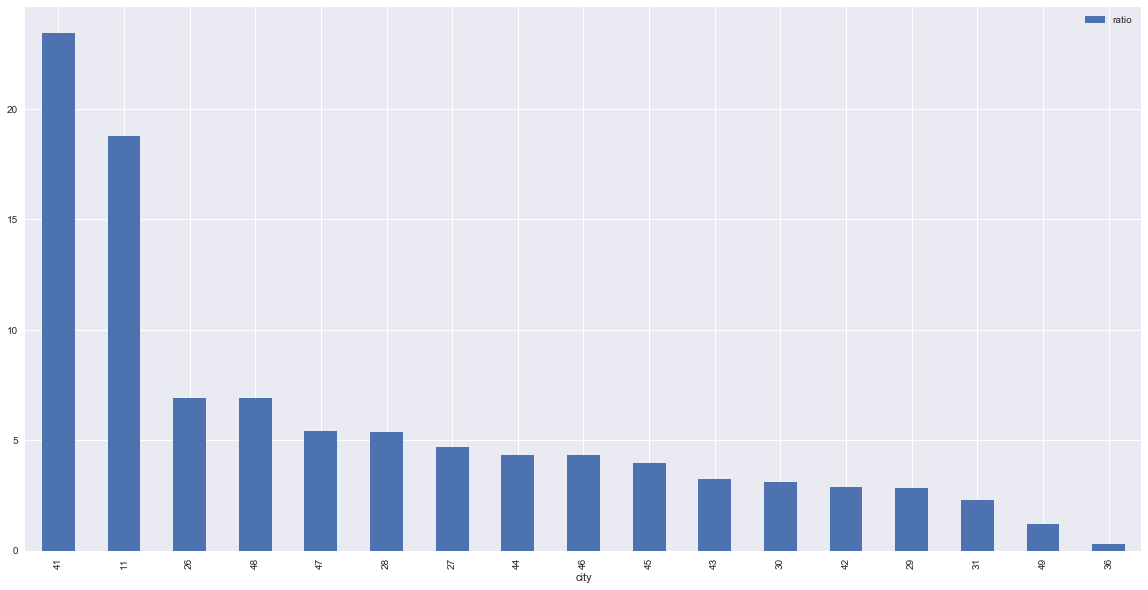

In [8]:
data_city=data.groupby('city').count()
data_city['ratio']=(data_city['treat_kind']/data_city['treat_kind'].sum())*100
data_city=data_city.sort_values('ratio',ascending=False)
data_city.plot.bar(y='ratio',figsize=(20,10))

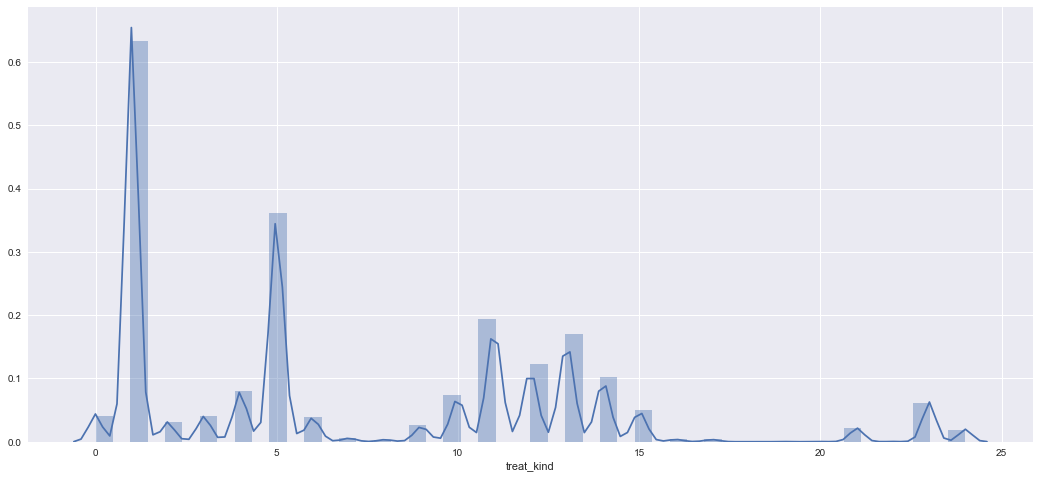

In [304]:
figure, ax = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 8)

ignore_high_treat = data[data["treat_kind"] < 25]
sns.distplot(ignore_high_treat["treat_kind"], hist=True)
plt.savefig('hello.png',dpi=500)

(-1.1106422491915744,
 1.056296421701584,
 -1.1042392995426329,
 1.100201871406792)

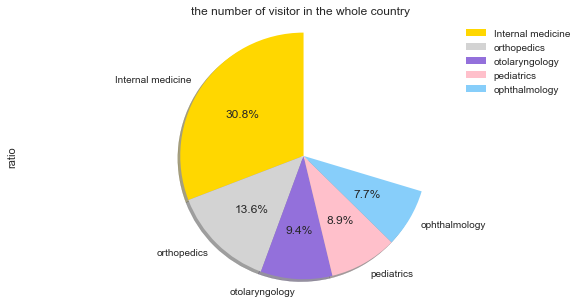

In [93]:
data_treat=data.groupby('treat_kind').count()
data_treat['ratio']=data_treat['city']/data_treat['city'].sum()
data_treat=data_treat.sort_values('ratio',ascending=False)
data_treat=data_treat.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_treat=data_treat.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold',  'lightgrey', 'mediumpurple','pink' ,'lightskyblue']
data_treat.plot.pie(y='ratio',explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in the whole country')
plt.axis('equal')

## Seoul

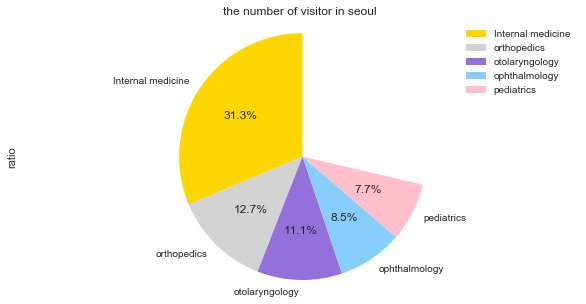

In [107]:
data_su=data[data['city']==11]
data_su_city=data_su.groupby('treat_kind').count()
data_su_city['ratio']=data_su_city['city']/data_su_city['city'].sum()
data_su_city=data_su_city.sort_values('ratio',ascending=False)
data_su_city=data_su_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_su_city=data_su_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'mediumpurple', 'lightskyblue','pink']
data_su_city.plot.pie(y='ratio', explode=explode, shadow=False, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in seoul')
plt.axis('equal')
plt.savefig('hello1.png', dpi=1000)

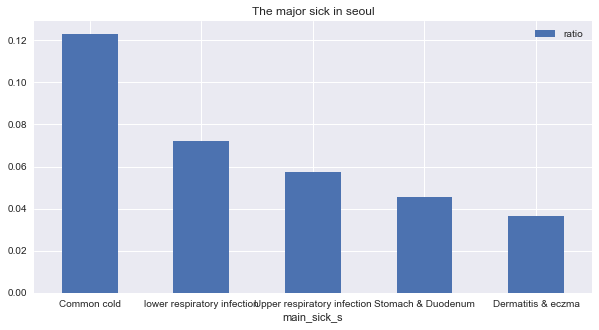

In [105]:
# The major sick in the seoul
data_su_sick=data_su.groupby('main_sick_s').count()
data_su_sick['ratio']=data_su_sick['city']/data_su_sick['city'].sum()
data_su_sick=data_su_sick.sort_values('ratio',ascending=False)
data_su_sick=data_su_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','L2':'Dermatitis & eczma'})
data_su_sick=data_su_sick.iloc[:5]
data_su_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in seoul')
plt.savefig('hello.png', dpi=500)

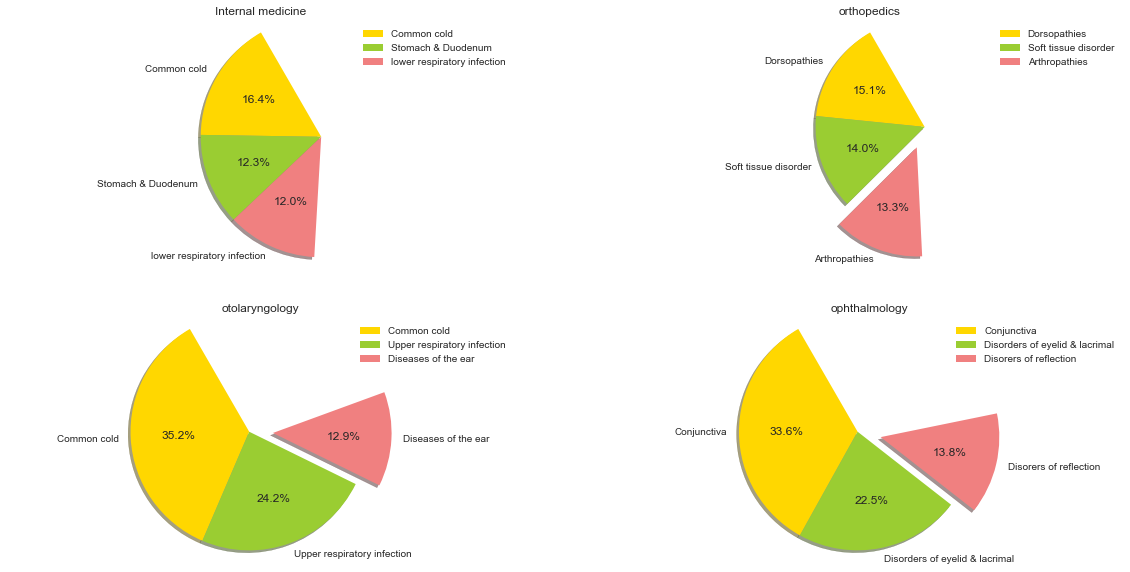

In [94]:
fig = plt.figure(figsize=(20,10))
# 내과
data_su_sick_1=data_su[data_su['treat_kind']==1]
data_su_sick_1=data_su_sick_1.groupby('main_sick_s').count()
data_su_sick_1['ratio']=data_su_sick_1['city']/data_su_sick_1['city'].sum()
data_su_sick_1=data_su_sick_1.sort_values('ratio',ascending=False)
data_su_sick_1=data_su_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_su_sick_1=data_su_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_su_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_su_sick_1.index)
plt.title('Internal medicine')
plt.axis('equal')
plt.legend()
# 정형외과
data_su_sick_2=data_su[data_su['treat_kind']==5]
data_su_sick_2=data_su_sick_2.groupby('main_sick_s').count()
data_su_sick_2['ratio']=data_su_sick_2['city']/data_su_sick_2['city'].sum()
data_su_sick_2=data_su_sick_2.sort_values('ratio',ascending=False)
data_su_sick_2=data_su_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_su_sick_2=data_su_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_su_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_su_sick_2.index)
plt.title('orthopedics')
plt.axis('equal')
plt.legend()
# 이비인후과
data_su_sick_3=data_su[data_su['treat_kind']==13]
data_su_sick_3=data_su_sick_3.groupby('main_sick_s').count()
data_su_sick_3['ratio']=data_su_sick_3['city']/data_su_sick_3['city'].sum()
data_su_sick_3=data_su_sick_3.sort_values('ratio',ascending=False)
data_su_sick_3=data_su_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','H6':'Diseases of the ear'})
data_su_sick_3=data_su_sick_3.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_su_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_su_sick_3.index)
plt.title('otolaryngology')
plt.axis('equal')
plt.legend()
# 안과
data_su_sick_4=data_su[data_su['treat_kind']==12]
data_su_sick_4=data_su_sick_4.groupby('main_sick_s').count()
data_su_sick_4['ratio']=data_su_sick_4['city']/data_su_sick_4['city'].sum()
data_su_sick_4=data_su_sick_4.sort_values('ratio',ascending=False)
data_su_sick_4=data_su_sick_4.rename(index={'H1':'Conjunctiva','H0':'Disorders of eyelid & lacrimal','H5':'Disorers of reflection'})
data_su_sick_4=data_su_sick_4.iloc[:3]
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_su_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_su_sick_4.index)
plt.title('ophthalmology')
plt.axis('equal')
plt.legend()

## Busan

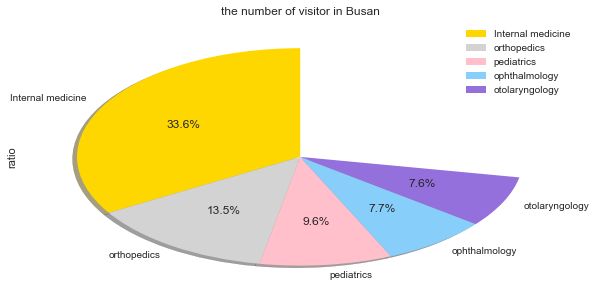

In [13]:
data_bs=data[data['city']==26]
data_bs_city=data_bs.groupby('treat_kind').count()
data_bs_city['ratio']=data_bs_city['city']/data_bs_city['city'].sum()
data_bs_city=data_bs_city.sort_values('ratio',ascending=False)
data_bs_city=data_bs_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_bs_city=data_bs_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'pink','lightskyblue','mediumpurple']
data_bs_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Busan')

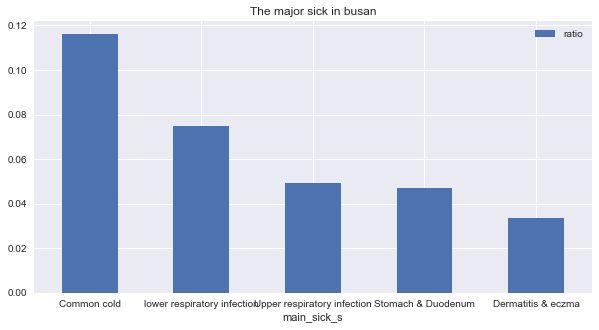

In [14]:
# The major sick in the Busan
data_bs_sick=data_bs.groupby('main_sick_s').count()
data_bs_sick['ratio']=data_bs_sick['city']/data_bs_sick['city'].sum()
data_bs_sick=data_bs_sick.sort_values('ratio',ascending=False)
data_bs_sick=data_bs_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','L2':'Dermatitis & eczma'})
data_bs_sick=data_bs_sick.iloc[:5]
data_bs_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in busan')

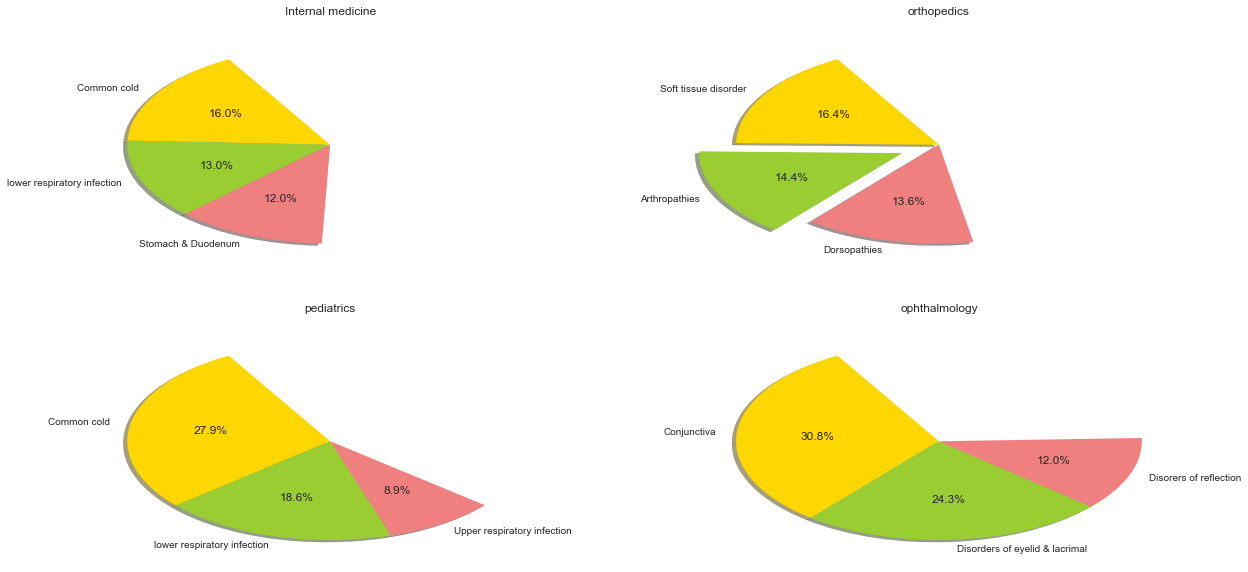

In [15]:
fig = plt.figure(figsize=(20,10))
# 내과
data_bs_sick_1=data_bs[data_bs['treat_kind']==1]
data_bs_sick_1=data_bs_sick_1.groupby('main_sick_s').count()
data_bs_sick_1['ratio']=data_bs_sick_1['city']/data_bs_sick_1['city'].sum()
data_bs_sick_1=data_bs_sick_1.sort_values('ratio',ascending=False)
data_bs_sick_1=data_bs_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_bs_sick_1=data_bs_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_bs_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_bs_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_bs_sick_2=data_bs[data_bs['treat_kind']==5]
data_bs_sick_2=data_bs_sick_2.groupby('main_sick_s').count()
data_bs_sick_2['ratio']=data_bs_sick_2['city']/data_bs_sick_2['city'].sum()
data_bs_sick_2=data_bs_sick_2.sort_values('ratio',ascending=False)
data_bs_sick_2=data_bs_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_bs_sick_2=data_bs_sick_2.iloc[:3]
explode = (0, 0.2, 0) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_bs_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_bs_sick_2.index)
plt.title('orthopedics')
# 소아청소년과
data_bs_sick_3=data_bs[data_bs['treat_kind']==11]
data_bs_sick_3=data_bs_sick_3.groupby('main_sick_s').count()
data_bs_sick_3['ratio']=data_bs_sick_3['city']/data_bs_sick_3['city'].sum()
data_bs_sick_3=data_bs_sick_3.sort_values('ratio',ascending=False)
data_bs_sick_3=data_bs_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_bs_sick_3=data_bs_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_bs_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_bs_sick_3.index)
plt.title('pediatrics')
# 안과
data_bs_sick_4=data_bs[data_bs['treat_kind']==12]
data_bs_sick_4=data_bs_sick_4.groupby('main_sick_s').count()
data_bs_sick_4['ratio']=data_bs_sick_4['city']/data_bs_sick_4['city'].sum()
data_bs_sick_4=data_bs_sick_4.sort_values('ratio',ascending=False)
data_bs_sick_4=data_bs_sick_4.rename(index={'H1':'Conjunctiva','H0':'Disorders of eyelid & lacrimal','H5':'Disorers of reflection'})
data_bs_sick_4=data_bs_sick_4.iloc[:3]
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_bs_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_bs_sick_4.index)
plt.title('ophthalmology')

## Daegu

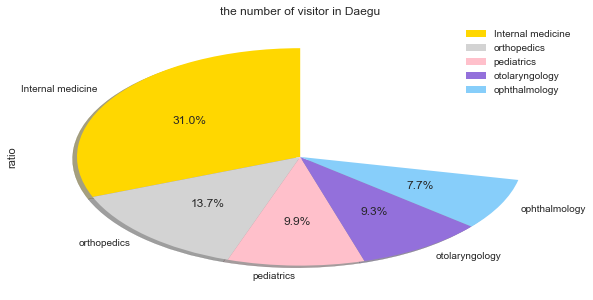

In [16]:
data_dg=data[data['city']==27]
data_dg_city=data_dg.groupby('treat_kind').count()
data_dg_city['ratio']=data_dg_city['city']/data_dg_city['city'].sum()
data_dg_city=data_dg_city.sort_values('ratio',ascending=False)
data_dg_city=data_dg_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_dg_city=data_dg_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey' , 'pink','mediumpurple', 'lightskyblue']
data_dg_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Daegu')

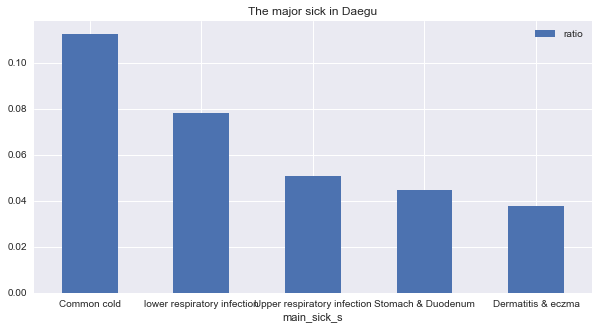

In [18]:
# The major sick in the Daegu
data_dg_sick=data_dg.groupby('main_sick_s').count()
data_dg_sick['ratio']=data_dg_sick['city']/data_dg_sick['city'].sum()
data_dg_sick=data_dg_sick.sort_values('ratio',ascending=False)
data_dg_sick=data_dg_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','L2':'Dermatitis & eczma'})
data_dg_sick=data_dg_sick.iloc[:5]
data_dg_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Daegu')

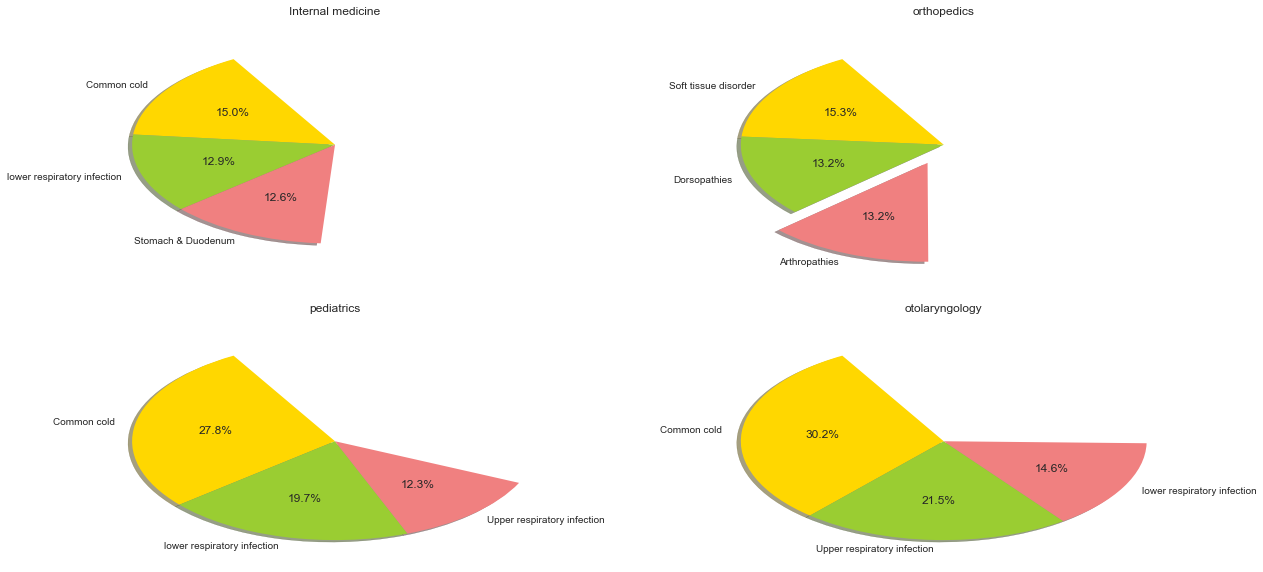

In [17]:
fig = plt.figure(figsize=(20,10))
# 내과
data_dg_sick_1=data_dg[data_dg['treat_kind']==1]
data_dg_sick_1=data_dg_sick_1.groupby('main_sick_s').count()
data_dg_sick_1['ratio']=data_dg_sick_1['city']/data_dg_sick_1['city'].sum()
data_dg_sick_1=data_dg_sick_1.sort_values('ratio',ascending=False)
data_dg_sick_1=data_dg_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_dg_sick_1=data_dg_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_dg_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_dg_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_dg_sick_2=data_dg[data_dg['treat_kind']==5]
data_dg_sick_2=data_dg_sick_2.groupby('main_sick_s').count()
data_dg_sick_2['ratio']=data_dg_sick_2['city']/data_dg_sick_2['city'].sum()
data_dg_sick_2=data_dg_sick_2.sort_values('ratio',ascending=False)
data_dg_sick_2=data_dg_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_dg_sick_2=data_dg_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_dg_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_dg_sick_2.index)
plt.title('orthopedics')
# 소아청소년과
data_dg_sick_3=data_dg[data_dg['treat_kind']==11]
data_dg_sick_3=data_dg_sick_3.groupby('main_sick_s').count()
data_dg_sick_3['ratio']=data_dg_sick_3['city']/data_dg_sick_3['city'].sum()
data_dg_sick_3=data_dg_sick_3.sort_values('ratio',ascending=False)
data_dg_sick_3=data_dg_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_dg_sick_3=data_dg_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_dg_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_dg_sick_3.index)
plt.title('pediatrics')
# 이비인후과
data_dg_sick_4=data_dg[data_dg['treat_kind']==13]
data_dg_sick_4=data_dg_sick_4.groupby('main_sick_s').count()
data_dg_sick_4['ratio']=data_dg_sick_4['city']/data_dg_sick_4['city'].sum()
data_dg_sick_4=data_dg_sick_4.sort_values('ratio',ascending=False)
data_dg_sick_4=data_dg_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_dg_sick_4=data_dg_sick_4.iloc[:3]
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_dg_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_dg_sick_4.index)
plt.title('otolaryngology')

## Incheon

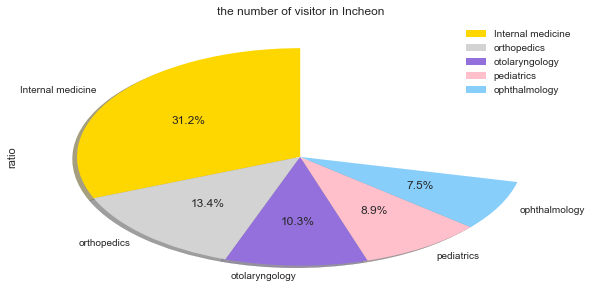

In [19]:
data_ic=data[data['city']==28]
data_ic_city=data_ic.groupby('treat_kind').count()
data_ic_city['ratio']=data_ic_city['city']/data_ic_city['city'].sum()
data_ic_city=data_ic_city.sort_values('ratio',ascending=False)
data_ic_city=data_ic_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_ic_city=data_ic_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold','lightgrey','mediumpurple', 'pink','lightskyblue']
data_ic_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Incheon')

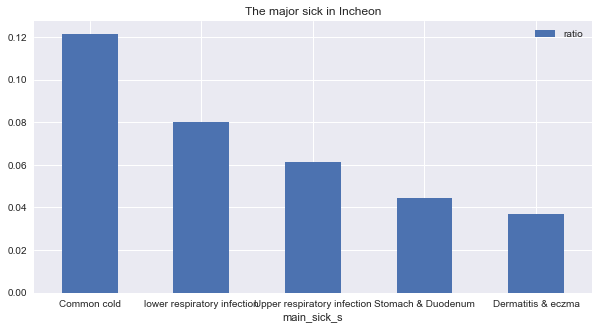

In [20]:
# The major sick in the Incheon
data_ic_sick=data_ic.groupby('main_sick_s').count()
data_ic_sick['ratio']=data_ic_sick['city']/data_ic_sick['city'].sum()
data_ic_sick=data_ic_sick.sort_values('ratio',ascending=False)
data_ic_sick=data_ic_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','L2':'Dermatitis & eczma'})
data_ic_sick=data_ic_sick.iloc[:5]
data_ic_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Incheon')

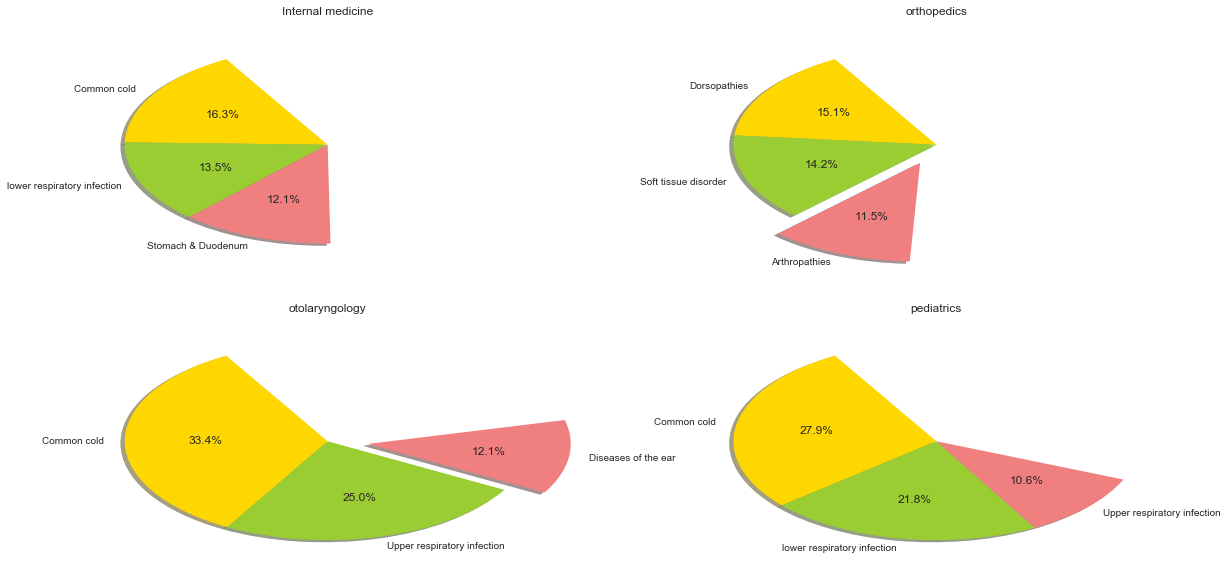

In [21]:
fig = plt.figure(figsize=(20,10))
# 내과
data_ic_sick_1=data_ic[data_ic['treat_kind']==1]
data_ic_sick_1=data_ic_sick_1.groupby('main_sick_s').count()
data_ic_sick_1['ratio']=data_ic_sick_1['city']/data_ic_sick_1['city'].sum()
data_ic_sick_1=data_ic_sick_1.sort_values('ratio',ascending=False)
data_ic_sick_1=data_ic_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_ic_sick_1=data_ic_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_ic_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_ic_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_ic_sick_2=data_ic[data_ic['treat_kind']==5]
data_ic_sick_2=data_ic_sick_2.groupby('main_sick_s').count()
data_ic_sick_2['ratio']=data_ic_sick_2['city']/data_ic_sick_2['city'].sum()
data_ic_sick_2=data_ic_sick_2.sort_values('ratio',ascending=False)
data_ic_sick_2=data_ic_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_ic_sick_2=data_ic_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_ic_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_ic_sick_2.index)
plt.title('orthopedics')
# 이비인후과
data_ic_sick_3=data_ic[data_ic['treat_kind']==13]
data_ic_sick_3=data_ic_sick_3.groupby('main_sick_s').count()
data_ic_sick_3['ratio']=data_ic_sick_3['city']/data_ic_sick_3['city'].sum()
data_ic_sick_3=data_ic_sick_3.sort_values('ratio',ascending=False)
data_ic_sick_3=data_ic_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','H6':'Diseases of the ear'})
data_ic_sick_3=data_ic_sick_3.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_ic_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_ic_sick_3.index)
plt.title('otolaryngology')
# 소아청소년과
data_ic_sick_4=data_ic[data_ic['treat_kind']==11]
data_ic_sick_4=data_ic_sick_4.groupby('main_sick_s').count()
data_ic_sick_4['ratio']=data_ic_sick_4['city']/data_ic_sick_4['city'].sum()
data_ic_sick_4=data_ic_sick_4.sort_values('ratio',ascending=False)
data_ic_sick_4=data_ic_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_ic_sick_4=data_ic_sick_4.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_ic_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_ic_sick_4.index)
plt.title('pediatrics')

## Gwangju

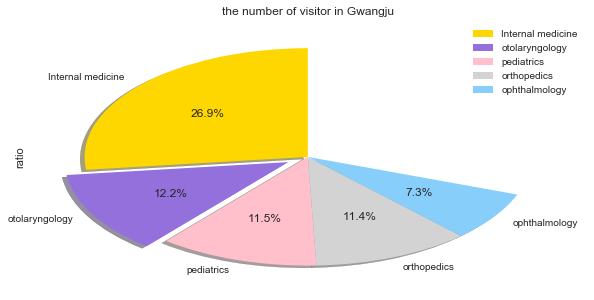

In [22]:
data_gj=data[data['city']==29]
data_gj_city=data_gj.groupby('treat_kind').count()
data_gj_city['ratio']=data_gj_city['city']/data_gj_city['city'].sum()
data_gj_city=data_gj_city.sort_values('ratio',ascending=False)
data_gj_city=data_gj_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_gj_city=data_gj_city.iloc[:5]
explode = (0, 0.1, 0, 0,0) 
colors = ['gold','mediumpurple' , 'pink','lightgrey', 'lightskyblue']
data_gj_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Gwangju')

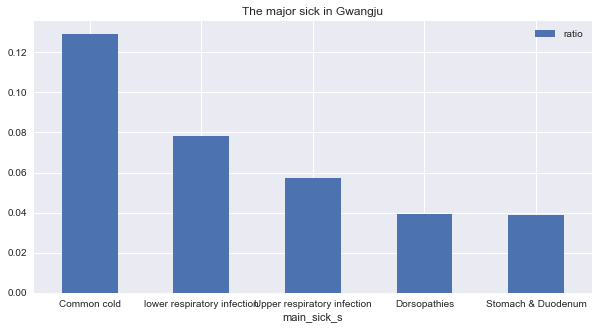

In [23]:
# The major sick in the Gwangju
data_gj_sick=data_gj.groupby('main_sick_s').count()
data_gj_sick['ratio']=data_gj_sick['city']/data_gj_sick['city'].sum()
data_gj_sick=data_gj_sick.sort_values('ratio',ascending=False)
data_gj_sick=data_gj_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','M5':'Dorsopathies'})
data_gj_sick=data_gj_sick.iloc[:5]
data_gj_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Gwangju')

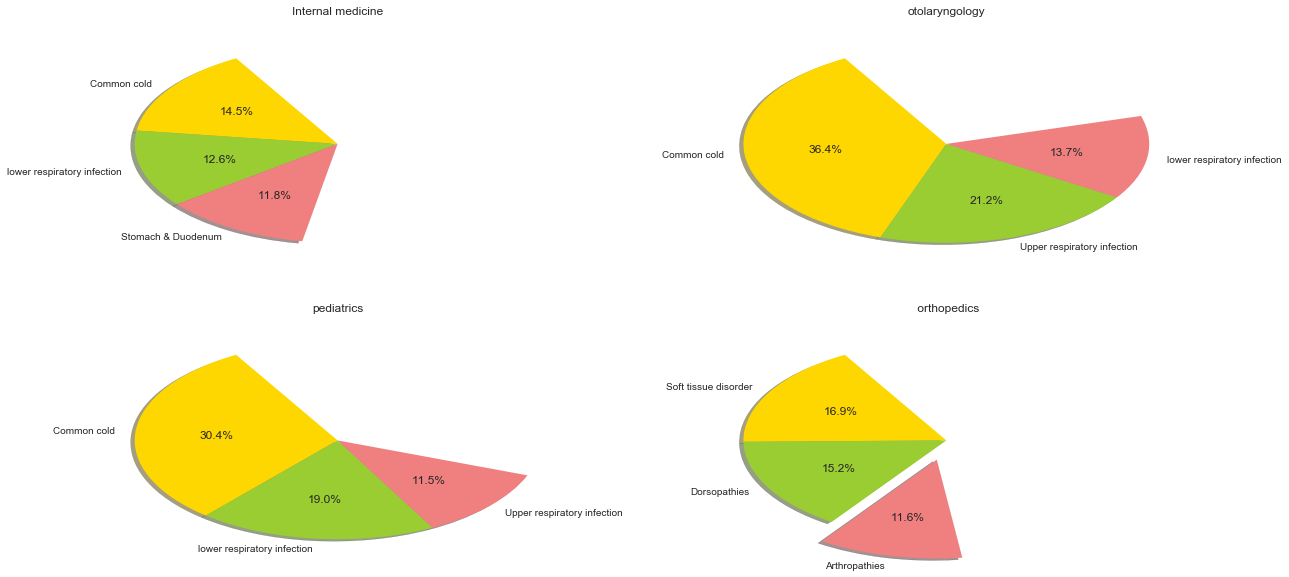

In [24]:
fig = plt.figure(figsize=(20,10))
# 내과
data_gj_sick_1=data_gj[data_gj['treat_kind']==1]
data_gj_sick_1=data_gj_sick_1.groupby('main_sick_s').count()
data_gj_sick_1['ratio']=data_gj_sick_1['city']/data_gj_sick_1['city'].sum()
data_gj_sick_1=data_gj_sick_1.sort_values('ratio',ascending=False)
data_gj_sick_1=data_gj_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_gj_sick_1=data_gj_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_gj_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gj_sick_1.index)
plt.title('Internal medicine')
# 이비인후과
data_gj_sick_2=data_gj[data_gj['treat_kind']==13]
data_gj_sick_2=data_gj_sick_2.groupby('main_sick_s').count()
data_gj_sick_2['ratio']=data_gj_sick_2['city']/data_gj_sick_2['city'].sum()
data_gj_sick_2=data_gj_sick_2.sort_values('ratio',ascending=False)
data_gj_sick_2=data_gj_sick_2.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_gj_sick_2=data_gj_sick_2.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_gj_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gj_sick_2.index)
plt.title('otolaryngology')
# 소아청소년과
data_gj_sick_3=data_gj[data_gj['treat_kind']==11]
data_gj_sick_3=data_gj_sick_3.groupby('main_sick_s').count()
data_gj_sick_3['ratio']=data_gj_sick_3['city']/data_gj_sick_3['city'].sum()
data_gj_sick_3=data_gj_sick_3.sort_values('ratio',ascending=False)
data_gj_sick_3=data_gj_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_gj_sick_3=data_gj_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_gj_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gj_sick_3.index)
plt.title('pediatrics')
# 정형외과
data_gj_sick_4=data_gj[data_gj['treat_kind']==5]
data_gj_sick_4=data_gj_sick_4.groupby('main_sick_s').count()
data_gj_sick_4['ratio']=data_gj_sick_4['city']/data_gj_sick_4['city'].sum()
data_gj_sick_4=data_gj_sick_4.sort_values('ratio',ascending=False)
data_gj_sick_4=data_gj_sick_4.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_gj_sick_4=data_gj_sick_4.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_gj_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gj_sick_4.index)
plt.title(' orthopedics')

## Daejeon

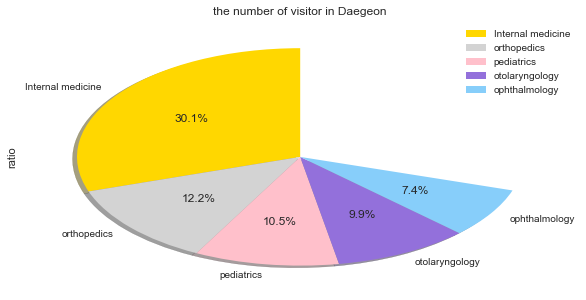

In [25]:
data_dj=data[data['city']==30]
data_dj_city=data_dj.groupby('treat_kind').count()
data_dj_city['ratio']=data_dj_city['city']/data_dj_city['city'].sum()
data_dj_city=data_dj_city.sort_values('ratio',ascending=False)
data_dj_city=data_dj_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_dj_city=data_dj_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey','pink', 'mediumpurple', 'lightskyblue']
data_dj_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Daegeon')

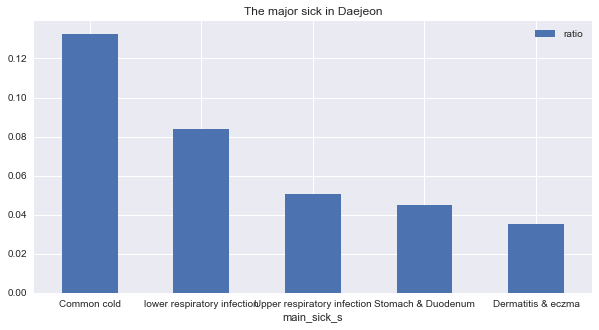

In [26]:
# The major sick in the Daejeon
data_dj_sick=data_dj.groupby('main_sick_s').count()
data_dj_sick['ratio']=data_dj_sick['city']/data_dj_sick['city'].sum()
data_dj_sick=data_dj_sick.sort_values('ratio',ascending=False)
data_dj_sick=data_dj_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','L2':'Dermatitis & eczma'})
data_dj_sick=data_dj_sick.iloc[:5]
data_dj_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Daejeon')

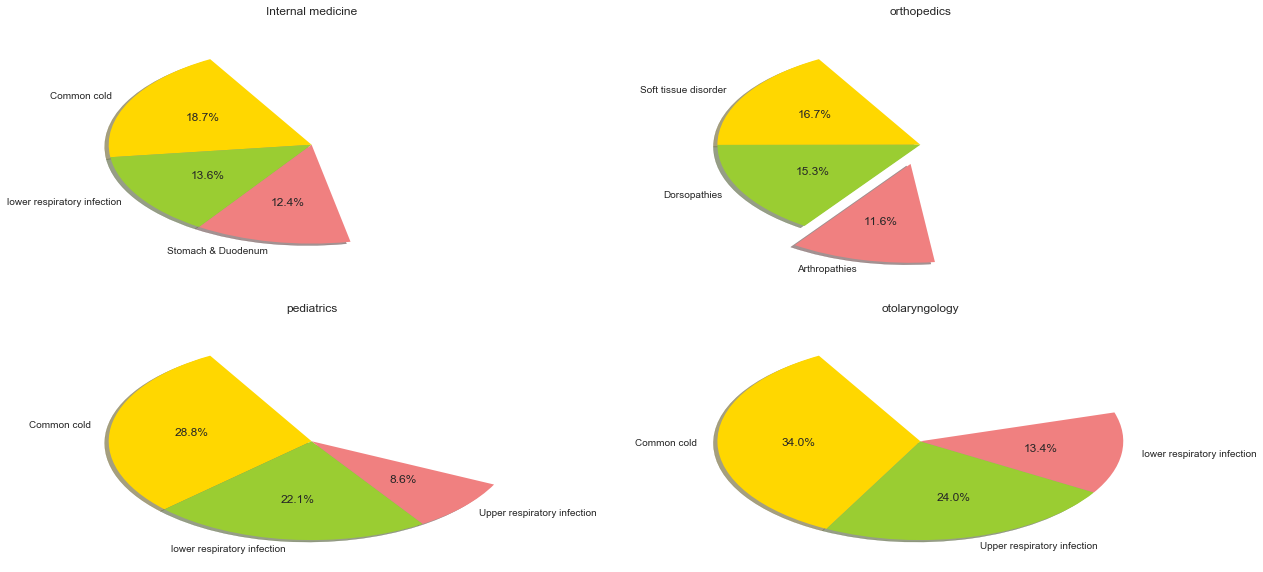

In [27]:
fig = plt.figure(figsize=(20,10))
# 내과
data_dj_sick_1=data_dj[data_dj['treat_kind']==1]
data_dj_sick_1=data_dj_sick_1.groupby('main_sick_s').count()
data_dj_sick_1['ratio']=data_dj_sick_1['city']/data_dj_sick_1['city'].sum()
data_dj_sick_1=data_dj_sick_1.sort_values('ratio',ascending=False)
data_dj_sick_1=data_dj_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_dj_sick_1=data_dj_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_dj_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_dj_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_dj_sick_2=data_dj[data_dj['treat_kind']==5]
data_dj_sick_2=data_dj_sick_2.groupby('main_sick_s').count()
data_dj_sick_2['ratio']=data_dj_sick_2['city']/data_dj_sick_2['city'].sum()
data_dj_sick_2=data_dj_sick_2.sort_values('ratio',ascending=False)
data_dj_sick_2=data_dj_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_dj_sick_2=data_dj_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_dj_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_dj_sick_2.index)
plt.title('orthopedics')
# 소아청소년과
data_dj_sick_3=data_dj[data_dj['treat_kind']==11]
data_dj_sick_3=data_dj_sick_3.groupby('main_sick_s').count()
data_dj_sick_3['ratio']=data_dj_sick_3['city']/data_dj_sick_3['city'].sum()
data_dj_sick_3=data_dj_sick_3.sort_values('ratio',ascending=False)
data_dj_sick_3=data_dj_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_dj_sick_3=data_dj_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_dj_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_dj_sick_3.index)
plt.title('pediatrics')
# 이비인후과
data_dj_sick_4=data_dj[data_dj['treat_kind']==13]
data_dj_sick_4=data_dj_sick_4.groupby('main_sick_s').count()
data_dj_sick_4['ratio']=data_dj_sick_4['city']/data_dj_sick_4['city'].sum()
data_dj_sick_4=data_dj_sick_4.sort_values('ratio',ascending=False)
data_dj_sick_4=data_dj_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_dj_sick_4=data_dj_sick_4.iloc[:3]
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_dj_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_dj_sick_4.index)
plt.title('otolaryngology')

## Ulsan

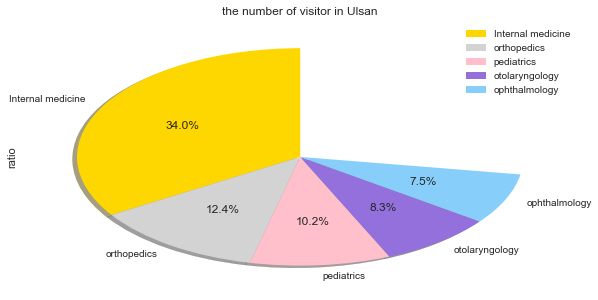

In [28]:
data_us=data[data['city']==31]
data_us_city=data_us.groupby('treat_kind').count()
data_us_city['ratio']=data_us_city['city']/data_us_city['city'].sum()
data_us_city=data_us_city.sort_values('ratio',ascending=False)
data_us_city=data_us_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_us_city=data_us_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey','pink','mediumpurple', 'lightskyblue']
data_us_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Ulsan')

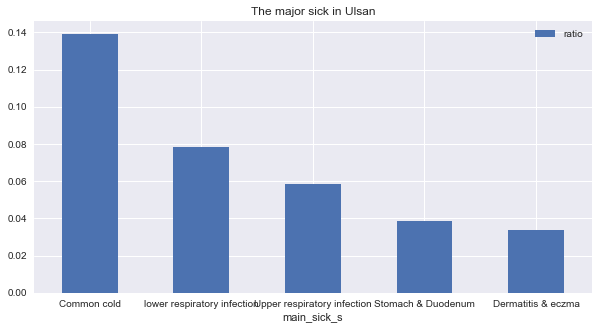

In [29]:
# The major sick in the Ulsan
data_us_sick=data_us.groupby('main_sick_s').count()
data_us_sick['ratio']=data_us_sick['city']/data_us_sick['city'].sum()
data_us_sick=data_us_sick.sort_values('ratio',ascending=False)
data_us_sick=data_us_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','L2':'Dermatitis & eczma'})
data_us_sick=data_us_sick.iloc[:5]
data_us_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Ulsan')

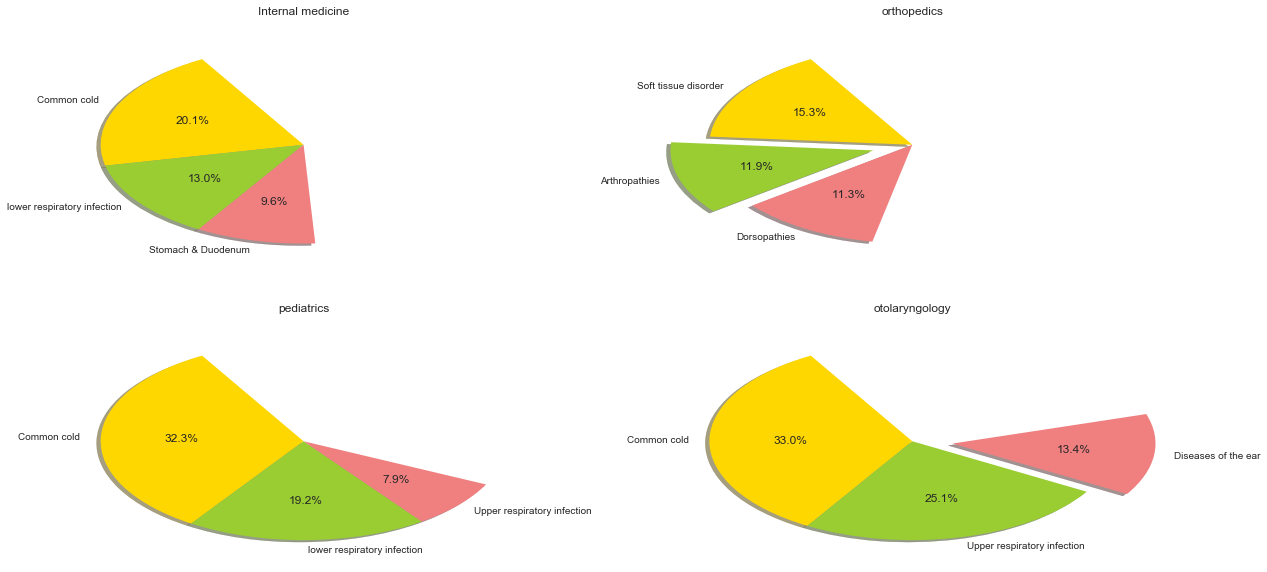

In [30]:
fig = plt.figure(figsize=(20,10))
# 내과
data_us_sick_1=data_us[data_us['treat_kind']==1]
data_us_sick_1=data_us_sick_1.groupby('main_sick_s').count()
data_us_sick_1['ratio']=data_us_sick_1['city']/data_us_sick_1['city'].sum()
data_us_sick_1=data_us_sick_1.sort_values('ratio',ascending=False)
data_us_sick_1=data_us_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_us_sick_1=data_us_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_us_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_us_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_us_sick_2=data_us[data_us['treat_kind']==5]
data_us_sick_2=data_us_sick_2.groupby('main_sick_s').count()
data_us_sick_2['ratio']=data_us_sick_2['city']/data_us_sick_2['city'].sum()
data_us_sick_2=data_us_sick_2.sort_values('ratio',ascending=False)
data_us_sick_2=data_us_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_us_sick_2=data_us_sick_2.iloc[:3]
explode = (0, 0.2, 0) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_us_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_us_sick_2.index)
plt.title('orthopedics')
# 소아청소년과
data_us_sick_3=data_us[data_us['treat_kind']==11]
data_us_sick_3=data_us_sick_3.groupby('main_sick_s').count()
data_us_sick_3['ratio']=data_us_sick_3['city']/data_us_sick_3['city'].sum()
data_us_sick_3=data_us_sick_3.sort_values('ratio',ascending=False)
data_us_sick_3=data_us_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_us_sick_3=data_us_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_us_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_us_sick_3.index)
plt.title('pediatrics')
# 이비인후과
data_us_sick_4=data_us[data_us['treat_kind']==13]
data_us_sick_4=data_us_sick_4.groupby('main_sick_s').count()
data_us_sick_4['ratio']=data_us_sick_4['city']/data_us_sick_4['city'].sum()
data_us_sick_4=data_us_sick_4.sort_values('ratio',ascending=False)
data_us_sick_4=data_us_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','H6':'Diseases of the ear'})
data_us_sick_4=data_us_sick_4.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_us_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_us_sick_4.index)
plt.title('otolaryngology')

## Gyeonggi

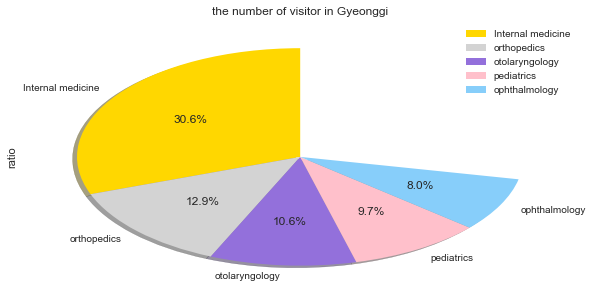

In [31]:
data_gg=data[data['city']==41]
data_gg_city=data_gg.groupby('treat_kind').count()
data_gg_city['ratio']=data_gg_city['city']/data_gg_city['city'].sum()
data_gg_city=data_gg_city.sort_values('ratio',ascending=False)
data_gg_city=data_gg_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_gg_city=data_gg_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'mediumpurple','pink' ,'lightskyblue']
data_gg_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Gyeonggi')

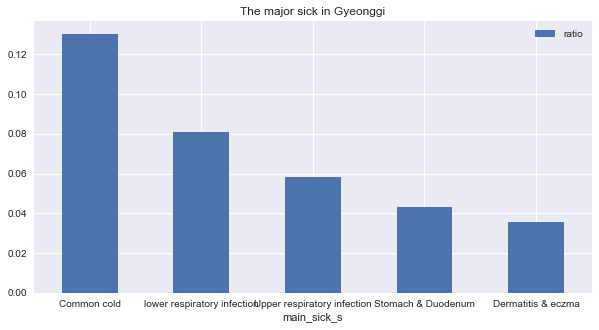

In [32]:
# The major sick in the Gyeonggi
data_gg_sick=data_gg.groupby('main_sick_s').count()
data_gg_sick['ratio']=data_gg_sick['city']/data_gg_sick['city'].sum()
data_gg_sick=data_gg_sick.sort_values('ratio',ascending=False)
data_gg_sick=data_gg_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','L2':'Dermatitis & eczma'})
data_gg_sick=data_gg_sick.iloc[:5]
data_gg_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Gyeonggi')

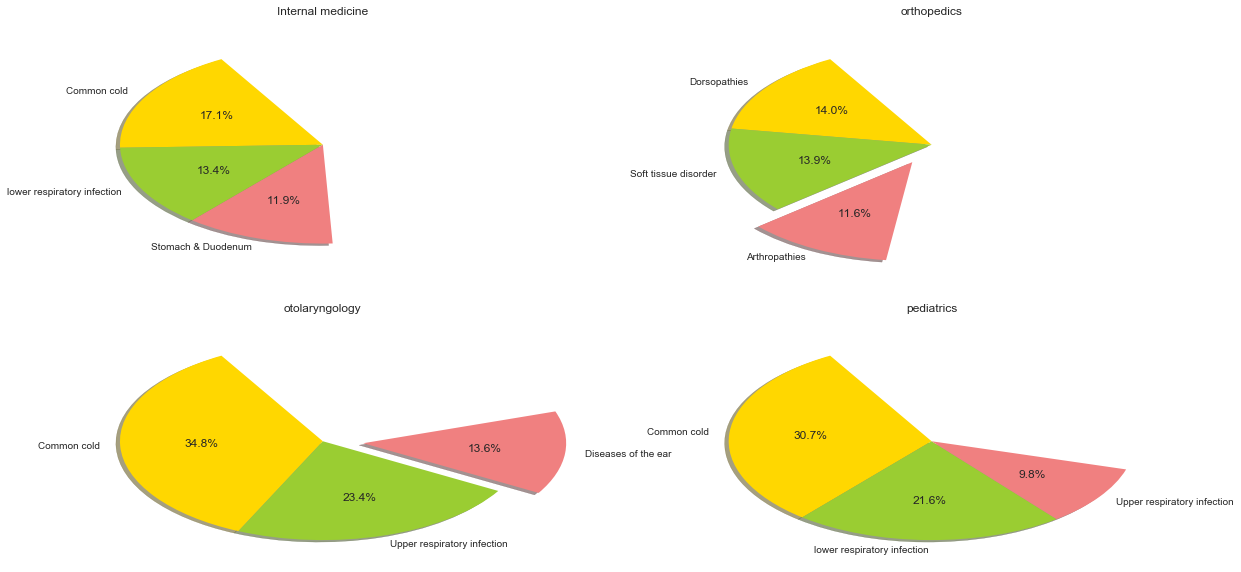

In [33]:
fig = plt.figure(figsize=(20,10))
# 내과
data_gg_sick_1=data_gg[data_gg['treat_kind']==1]
data_gg_sick_1=data_gg_sick_1.groupby('main_sick_s').count()
data_gg_sick_1['ratio']=data_gg_sick_1['city']/data_gg_sick_1['city'].sum()
data_gg_sick_1=data_gg_sick_1.sort_values('ratio',ascending=False)
data_gg_sick_1=data_gg_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_gg_sick_1=data_gg_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_gg_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gg_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_gg_sick_2=data_gg[data_gg['treat_kind']==5]
data_gg_sick_2=data_gg_sick_2.groupby('main_sick_s').count()
data_gg_sick_2['ratio']=data_gg_sick_2['city']/data_gg_sick_2['city'].sum()
data_gg_sick_2=data_gg_sick_2.sort_values('ratio',ascending=False)
data_gg_sick_2=data_gg_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_gg_sick_2=data_gg_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_gg_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gg_sick_2.index)
plt.title('orthopedics')
# 이비인후과
data_gg_sick_3=data_gg[data_gg['treat_kind']==13]
data_gg_sick_3=data_gg_sick_3.groupby('main_sick_s').count()
data_gg_sick_3['ratio']=data_gg_sick_3['city']/data_gg_sick_3['city'].sum()
data_gg_sick_3=data_gg_sick_3.sort_values('ratio',ascending=False)
data_gg_sick_3=data_gg_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','H6':'Diseases of the ear'})
data_gg_sick_3=data_gg_sick_3.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_gg_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gg_sick_3.index)
plt.title('otolaryngology')
# 소아청소년과
data_gg_sick_4=data_gg[data_gg['treat_kind']==11]
data_gg_sick_4=data_gg_sick_4.groupby('main_sick_s').count()
data_gg_sick_4['ratio']=data_gg_sick_4['city']/data_gg_sick_4['city'].sum()
data_gg_sick_4=data_gg_sick_4.sort_values('ratio',ascending=False)
data_gg_sick_4=data_gg_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_gg_sick_4=data_gg_sick_4.iloc[:3]
explode= (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_gg_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gg_sick_4.index)
plt.title('pediatrics')

## gangwon

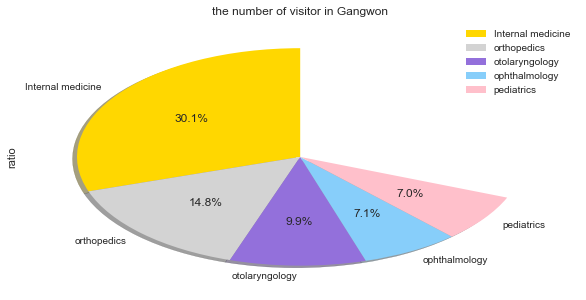

In [34]:
data_gw=data[data['city']==42]
data_gw_city=data_gw.groupby('treat_kind').count()
data_gw_city['ratio']=data_gw_city['city']/data_gw_city['city'].sum()
data_gw_city=data_gw_city.sort_values('ratio',ascending=False)
data_gw_city=data_gw_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_gw_city=data_gw_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'mediumpurple', 'lightskyblue','pink']
data_gw_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Gangwon')

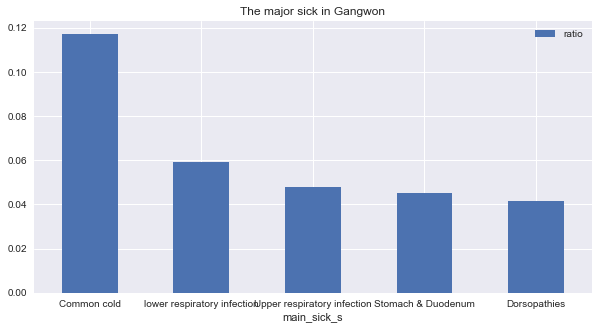

In [35]:
# The major sick in the Gannwon
data_gw_sick=data_gw.groupby('main_sick_s').count()
data_gw_sick['ratio']=data_gw_sick['city']/data_gw_sick['city'].sum()
data_gw_sick=data_gw_sick.sort_values('ratio',ascending=False)
data_gw_sick=data_gw_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','M5':'Dorsopathies'})
data_gw_sick=data_gw_sick.iloc[:5]
data_gw_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Gangwon')

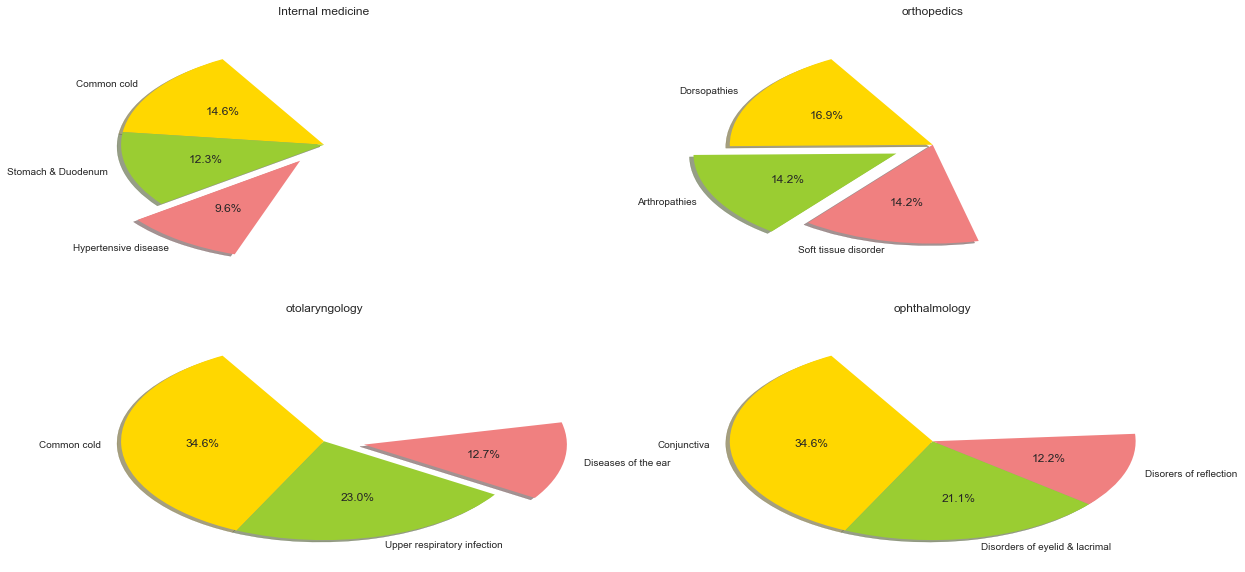

In [36]:
fig = plt.figure(figsize=(20,10))
# 내과
data_gw_sick_1=data_gw[data_gw['treat_kind']==1]
data_gw_sick_1=data_gw_sick_1.groupby('main_sick_s').count()
data_gw_sick_1['ratio']=data_gw_sick_1['city']/data_gw_sick_1['city'].sum()
data_gw_sick_1=data_gw_sick_1.sort_values('ratio',ascending=False)
data_gw_sick_1=data_gw_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','I1':'Hypertensive disease'})
data_gw_sick_1=data_gw_sick_1.iloc[:3]
explode = (0, 0, 0.2) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_gw_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gw_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_gw_sick_2=data_gw[data_gw['treat_kind']==5]
data_gw_sick_2=data_gw_sick_2.groupby('main_sick_s').count()
data_gw_sick_2['ratio']=data_gw_sick_2['city']/data_gw_sick_2['city'].sum()
data_gw_sick_2=data_gw_sick_2.sort_values('ratio',ascending=False)
data_gw_sick_2=data_gw_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_gw_sick_2=data_gw_sick_2.iloc[:3]
explode = (0, 0.2, 0) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_gw_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gw_sick_2.index)
plt.title('orthopedics')
# 이비인후과
data_gw_sick_3=data_gw[data_gw['treat_kind']==13]
data_gw_sick_3=data_gw_sick_3.groupby('main_sick_s').count()
data_gw_sick_3['ratio']=data_gw_sick_3['city']/data_gw_sick_3['city'].sum()
data_gw_sick_3=data_gw_sick_3.sort_values('ratio',ascending=False)
data_gw_sick_3=data_gw_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','H6':'Diseases of the ear'})
data_gw_sick_3=data_gw_sick_3.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_gw_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gw_sick_3.index)
plt.title('otolaryngology')
# 안과
data_gw_sick_4=data_gw[data_gw['treat_kind']==12]
data_gw_sick_4=data_gw_sick_4.groupby('main_sick_s').count()
data_gw_sick_4['ratio']=data_gw_sick_4['city']/data_gw_sick_4['city'].sum()
data_gw_sick_4=data_gw_sick_4.sort_values('ratio',ascending=False)
data_gw_sick_4=data_gw_sick_4.rename(index={'H1':'Conjunctiva','H0':'Disorders of eyelid & lacrimal','H5':'Disorers of reflection'})
data_gw_sick_4=data_gw_sick_4.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_gw_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gw_sick_4.index)
plt.title('ophthalmology')

## Chungbuk

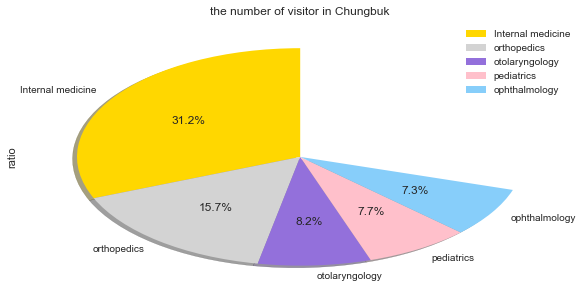

In [37]:
data_cb=data[data['city']==43]
data_cb_city=data_cb.groupby('treat_kind').count()
data_cb_city['ratio']=data_cb_city['city']/data_cb_city['city'].sum()
data_cb_city=data_cb_city.sort_values('ratio',ascending=False)
data_cb_city=data_cb_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_cb_city=data_cb_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'mediumpurple', 'pink','lightskyblue']
data_cb_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Chungbuk')

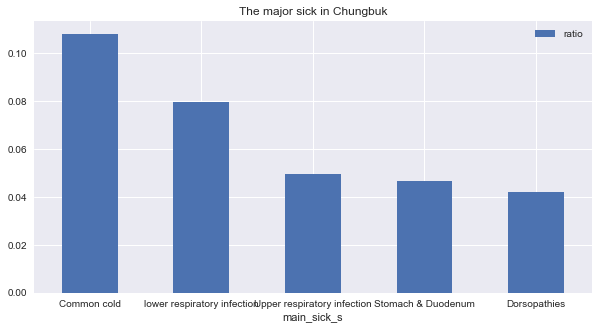

In [38]:
# The major sick in the Chungbuk
data_cb_sick=data_cb.groupby('main_sick_s').count()
data_cb_sick['ratio']=data_cb_sick['city']/data_cb_sick['city'].sum()
data_cb_sick=data_cb_sick.sort_values('ratio',ascending=False)
data_cb_sick=data_cb_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','M5':'Dorsopathies'})
data_cb_sick=data_cb_sick.iloc[:5]
data_cb_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Chungbuk')

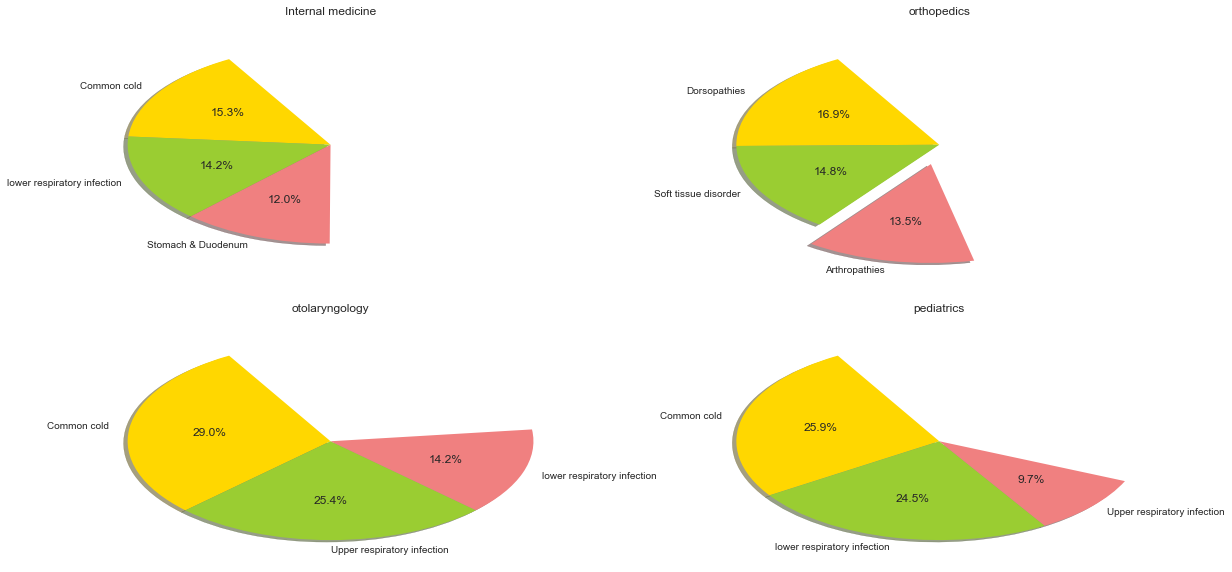

In [39]:
fig = plt.figure(figsize=(20,10))
# 내과
data_cb_sick_1=data_cb[data_cb['treat_kind']==1]
data_cb_sick_1=data_cb_sick_1.groupby('main_sick_s').count()
data_cb_sick_1['ratio']=data_cb_sick_1['city']/data_cb_sick_1['city'].sum()
data_cb_sick_1=data_cb_sick_1.sort_values('ratio',ascending=False)
data_cb_sick_1=data_cb_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_cb_sick_1=data_cb_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_cb_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_cb_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_cb_sick_2=data_cb[data_cb['treat_kind']==5]
data_cb_sick_2=data_cb_sick_2.groupby('main_sick_s').count()
data_cb_sick_2['ratio']=data_cb_sick_2['city']/data_cb_sick_2['city'].sum()
data_cb_sick_2=data_cb_sick_2.sort_values('ratio',ascending=False)
data_cb_sick_2=data_cb_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_cb_sick_2=data_cb_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_cb_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_cb_sick_2.index)
plt.title('orthopedics')
# 이비인후과
data_cb_sick_3=data_cb[data_cb['treat_kind']==13]
data_cb_sick_3=data_cb_sick_3.groupby('main_sick_s').count()
data_cb_sick_3['ratio']=data_cb_sick_3['city']/data_cb_sick_3['city'].sum()
data_cb_sick_3=data_cb_sick_3.sort_values('ratio',ascending=False)
data_cb_sick_3=data_cb_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_cb_sick_3=data_cb_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_cb_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_cb_sick_3.index)
plt.title('otolaryngology')
# 소아청소년과
data_cb_sick_4=data_cb[data_cb['treat_kind']==11]
data_cb_sick_4=data_cb_sick_4.groupby('main_sick_s').count()
data_cb_sick_4['ratio']=data_cb_sick_4['city']/data_cb_sick_4['city'].sum()
data_cb_sick_4=data_cb_sick_4.sort_values('ratio',ascending=False)
data_cb_sick_4=data_cb_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_cb_sick_4=data_cb_sick_4.iloc[:3]
explode= (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_cb_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_cb_sick_4.index)
plt.title('pediatrics')

## Chungnam

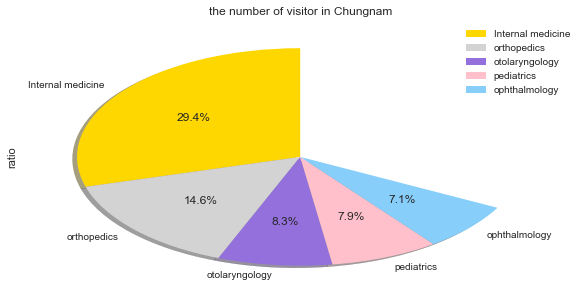

In [40]:
data_cn=data[data['city']==44]
data_cn_city=data_cn.groupby('treat_kind').count()
data_cn_city['ratio']=data_cn_city['city']/data_cn_city['city'].sum()
data_cn_city=data_cn_city.sort_values('ratio',ascending=False)
data_cn_city=data_cn_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_cn_city=data_cn_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'mediumpurple', 'pink','lightskyblue']
data_cn_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Chungnam')

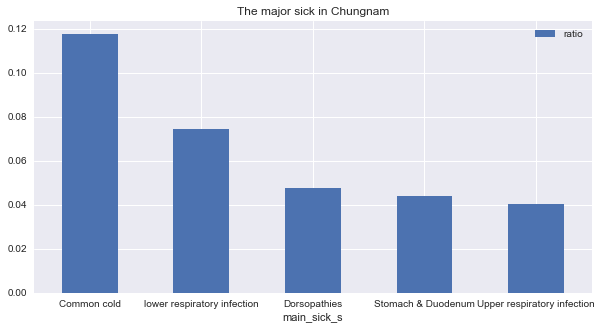

In [41]:
# The major sick in the Chungnam
data_cn_sick=data_cn.groupby('main_sick_s').count()
data_cn_sick['ratio']=data_cn_sick['city']/data_cn_sick['city'].sum()
data_cn_sick=data_cn_sick.sort_values('ratio',ascending=False)
data_cn_sick=data_cn_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','M5':'Dorsopathies'})
data_cn_sick=data_cn_sick.iloc[:5]
data_cn_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Chungnam')

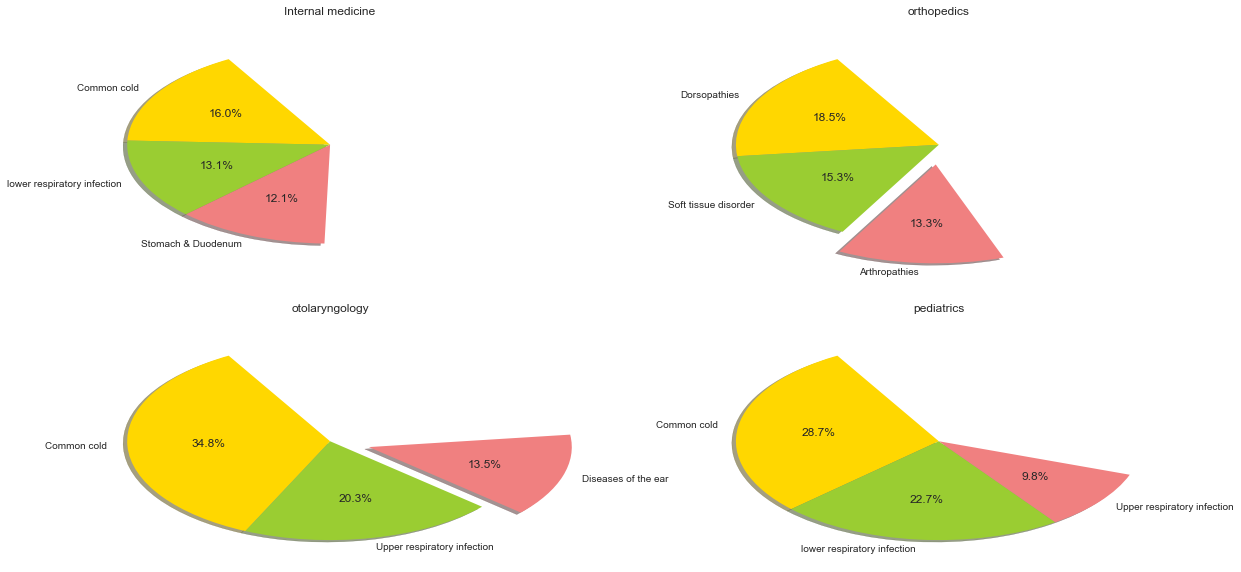

In [42]:
fig = plt.figure(figsize=(20,10))
# 내과
data_cn_sick_1=data_cn[data_cn['treat_kind']==1]
data_cn_sick_1=data_cn_sick_1.groupby('main_sick_s').count()
data_cn_sick_1['ratio']=data_cn_sick_1['city']/data_cn_sick_1['city'].sum()
data_cn_sick_1=data_cn_sick_1.sort_values('ratio',ascending=False)
data_cn_sick_1=data_cn_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_cn_sick_1=data_cn_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_cn_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_cn_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_cn_sick_2=data_cn[data_cn['treat_kind']==5]
data_cn_sick_2=data_cn_sick_2.groupby('main_sick_s').count()
data_cn_sick_2['ratio']=data_cn_sick_2['city']/data_cn_sick_2['city'].sum()
data_cn_sick_2=data_cn_sick_2.sort_values('ratio',ascending=False)
data_cn_sick_2=data_cn_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_cn_sick_2=data_cn_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_cn_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_cn_sick_2.index)
plt.title('orthopedics')
# 이비인후과
data_cn_sick_3=data_cn[data_cn['treat_kind']==13]
data_cn_sick_3=data_cn_sick_3.groupby('main_sick_s').count()
data_cn_sick_3['ratio']=data_cn_sick_3['city']/data_cn_sick_3['city'].sum()
data_cn_sick_3=data_cn_sick_3.sort_values('ratio',ascending=False)
data_cn_sick_3=data_cn_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','H6':'Diseases of the ear'})
data_cn_sick_3=data_cn_sick_3.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_cn_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_cn_sick_3.index)
plt.title('otolaryngology')
# 소아청소년과
data_cn_sick_4=data_cn[data_cn['treat_kind']==11]
data_cn_sick_4=data_cn_sick_4.groupby('main_sick_s').count()
data_cn_sick_4['ratio']=data_cn_sick_4['city']/data_cn_sick_4['city'].sum()
data_cn_sick_4=data_cn_sick_4.sort_values('ratio',ascending=False)
data_cn_sick_4=data_cn_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_cn_sick_4=data_cn_sick_4.iloc[:3]
explode= (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_cn_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_cn_sick_4.index)
plt.title('pediatrics')

## Jeonbuk

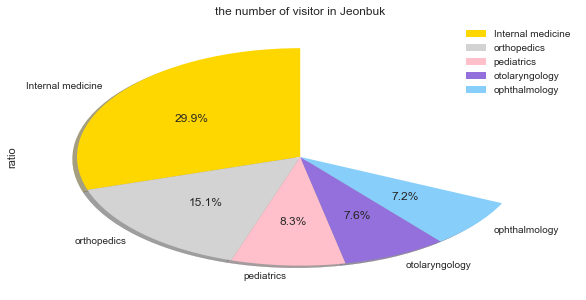

In [43]:
data_jb=data[data['city']==45]
data_jb_city=data_jb.groupby('treat_kind').count()
data_jb_city['ratio']=data_jb_city['city']/data_jb_city['city'].sum()
data_jb_city=data_jb_city.sort_values('ratio',ascending=False)
data_jb_city=data_jb_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_jb_city=data_jb_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'pink', 'mediumpurple', 'lightskyblue']
data_jb_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Jeonbuk')

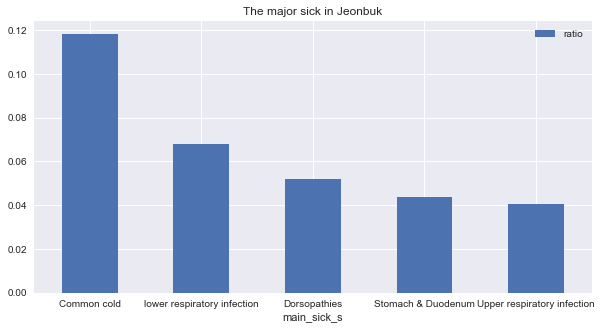

In [44]:
# The major sick in the Jeonbuk
data_jb_sick=data_jb.groupby('main_sick_s').count()
data_jb_sick['ratio']=data_jb_sick['city']/data_jb_sick['city'].sum()
data_jb_sick=data_jb_sick.sort_values('ratio',ascending=False)
data_jb_sick=data_jb_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','M5':'Dorsopathies'})
data_jb_sick=data_jb_sick.iloc[:5]
data_jb_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Jeonbuk')

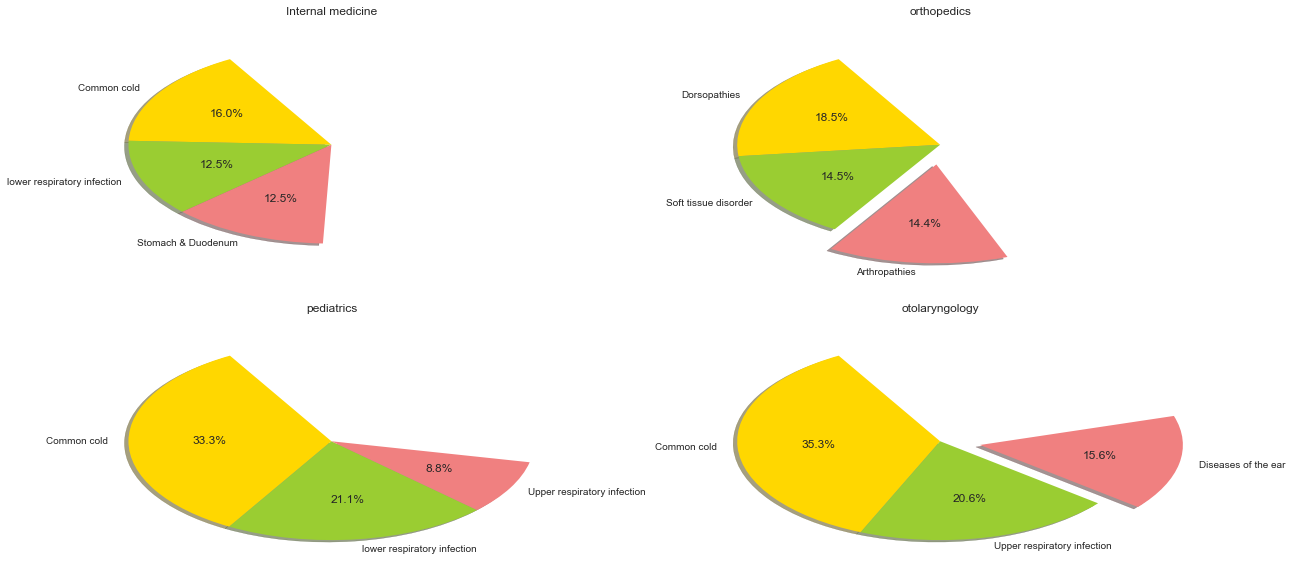

In [45]:
fig = plt.figure(figsize=(20,10))
# 내과
data_jb_sick_1=data_jb[data_jb['treat_kind']==1]
data_jb_sick_1=data_jb_sick_1.groupby('main_sick_s').count()
data_jb_sick_1['ratio']=data_jb_sick_1['city']/data_jb_sick_1['city'].sum()
data_jb_sick_1=data_jb_sick_1.sort_values('ratio',ascending=False)
data_jb_sick_1=data_jb_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_jb_sick_1=data_jb_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_jb_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jb_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_jb_sick_2=data_jb[data_jb['treat_kind']==5]
data_jb_sick_2=data_jb_sick_2.groupby('main_sick_s').count()
data_jb_sick_2['ratio']=data_jb_sick_2['city']/data_jb_sick_2['city'].sum()
data_jb_sick_2=data_jb_sick_2.sort_values('ratio',ascending=False)
data_jb_sick_2=data_jb_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_jb_sick_2=data_jb_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_jb_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jb_sick_2.index)
plt.title('orthopedics')
# 소아청소년과
data_jb_sick_3=data_jb[data_jb['treat_kind']==11]
data_jb_sick_3=data_jb_sick_3.groupby('main_sick_s').count()
data_jb_sick_3['ratio']=data_jb_sick_3['city']/data_jb_sick_3['city'].sum()
data_jb_sick_3=data_jb_sick_3.sort_values('ratio',ascending=False)
data_jb_sick_3=data_jb_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_jb_sick_3=data_jb_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_jb_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jb_sick_3.index)
plt.title('pediatrics')
# 이비인후과
data_jb_sick_4=data_jb[data_jb['treat_kind']==13]
data_jb_sick_4=data_jb_sick_4.groupby('main_sick_s').count()
data_jb_sick_4['ratio']=data_jb_sick_4['city']/data_jb_sick_4['city'].sum()
data_jb_sick_4=data_jb_sick_4.sort_values('ratio',ascending=False)
data_jb_sick_4=data_jb_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','H6':'Diseases of the ear'})
data_jb_sick_4=data_jb_sick_4.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_jb_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jb_sick_4.index)
plt.title('otolaryngology')

## Jeonnam

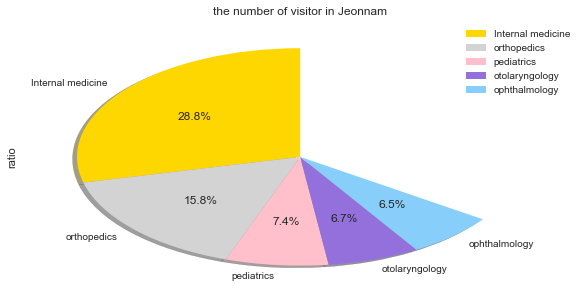

In [46]:
data_jn=data[data['city']==46]
data_jn_city=data_jn.groupby('treat_kind').count()
data_jn_city['ratio']=data_jn_city['city']/data_jn_city['city'].sum()
data_jn_city=data_jn_city.sort_values('ratio',ascending=False)
data_jn_city=data_jn_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_jn_city=data_jn_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'pink', 'mediumpurple','lightskyblue']
data_jn_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Jeonnam')

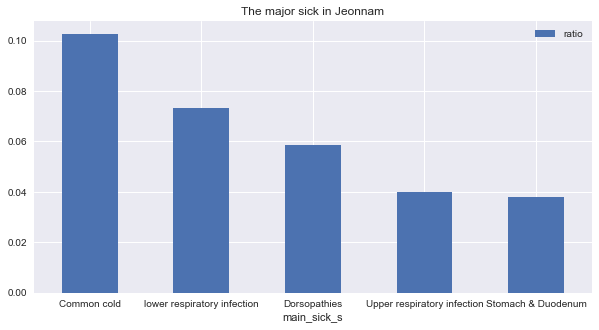

In [47]:
# The major sick in the Jeonnam
data_jn_sick=data_jn.groupby('main_sick_s').count()
data_jn_sick['ratio']=data_jn_sick['city']/data_jn_sick['city'].sum()
data_jn_sick=data_jn_sick.sort_values('ratio',ascending=False)
data_jn_sick=data_jn_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','M5':'Dorsopathies'})
data_jn_sick=data_jn_sick.iloc[:5]
data_jn_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Jeonnam')

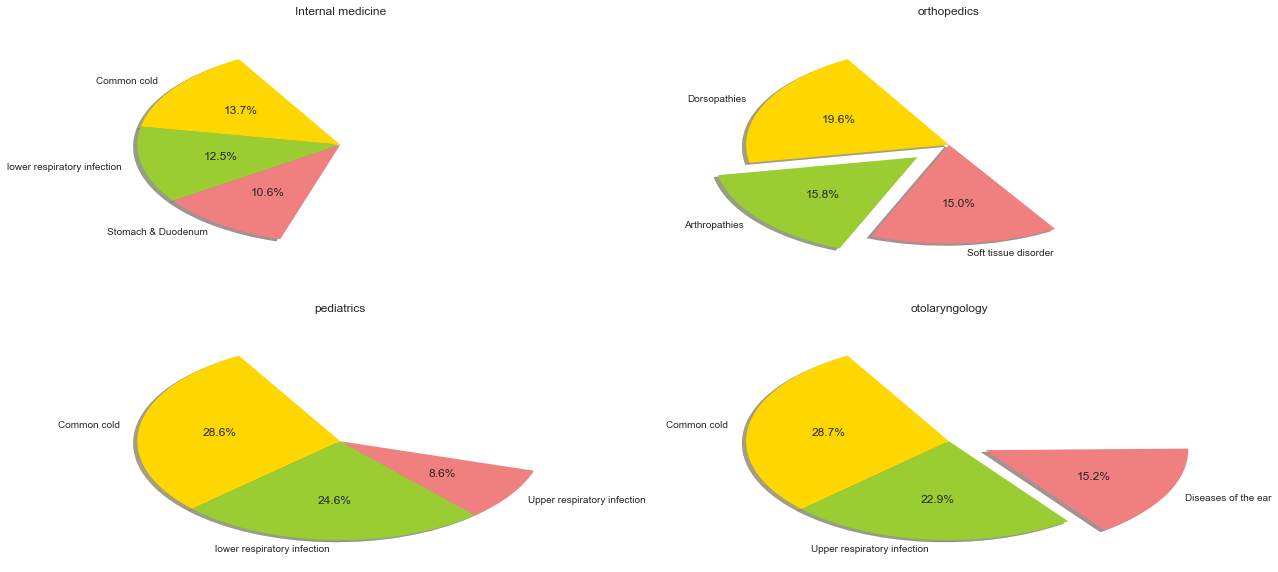

In [48]:
fig = plt.figure(figsize=(20,10))
# 내과
data_jn_sick_1=data_jn[data_jn['treat_kind']==1]
data_jn_sick_1=data_jn_sick_1.groupby('main_sick_s').count()
data_jn_sick_1['ratio']=data_jn_sick_1['city']/data_jn_sick_1['city'].sum()
data_jn_sick_1=data_jn_sick_1.sort_values('ratio',ascending=False)
data_jn_sick_1=data_jn_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_jn_sick_1=data_jn_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_jn_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jn_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_jn_sick_2=data_jn[data_jn['treat_kind']==5]
data_jn_sick_2=data_jn_sick_2.groupby('main_sick_s').count()
data_jn_sick_2['ratio']=data_jn_sick_2['city']/data_jn_sick_2['city'].sum()
data_jn_sick_2=data_jn_sick_2.sort_values('ratio',ascending=False)
data_jn_sick_2=data_jn_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_jn_sick_2=data_jn_sick_2.iloc[:3]
explode = (0, 0.2, 0) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_jn_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jn_sick_2.index)
plt.title('orthopedics')
# 소아청소년과
data_jn_sick_3=data_jn[data_jn['treat_kind']==11]
data_jn_sick_3=data_jn_sick_3.groupby('main_sick_s').count()
data_jn_sick_3['ratio']=data_jn_sick_3['city']/data_jn_sick_3['city'].sum()
data_jn_sick_3=data_jn_sick_3.sort_values('ratio',ascending=False)
data_jn_sick_3=data_jn_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_jn_sick_3=data_jn_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_jn_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jn_sick_3.index)
plt.title('pediatrics')
# 이비인후과
data_jn_sick_4=data_jn[data_jn['treat_kind']==13]
data_jn_sick_4=data_jn_sick_4.groupby('main_sick_s').count()
data_jn_sick_4['ratio']=data_jn_sick_4['city']/data_jn_sick_4['city'].sum()
data_jn_sick_4=data_jn_sick_4.sort_values('ratio',ascending=False)
data_jn_sick_4=data_jn_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','H6':'Diseases of the ear'})
data_jn_sick_4=data_jn_sick_4.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_jn_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jn_sick_4.index)
plt.title('otolaryngology')

## Gyeongbuk

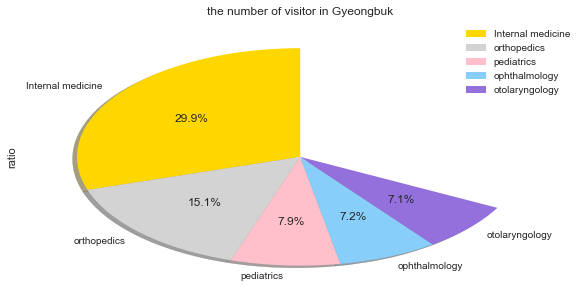

In [49]:
data_gb=data[data['city']==47]
data_gb_city=data_gb.groupby('treat_kind').count()
data_gb_city['ratio']=data_gb_city['city']/data_gb_city['city'].sum()
data_gb_city=data_gb_city.sort_values('ratio',ascending=False)
data_gb_city=data_gb_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_gb_city=data_gb_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'pink', 'lightskyblue','mediumpurple']
data_gb_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Gyeongbuk')

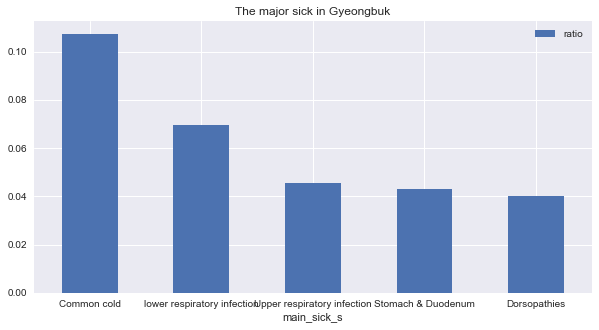

In [50]:
# The major sick in the Gyeongbuk
data_gb_sick=data_gb.groupby('main_sick_s').count()
data_gb_sick['ratio']=data_gb_sick['city']/data_gb_sick['city'].sum()
data_gb_sick=data_gb_sick.sort_values('ratio',ascending=False)
data_gb_sick=data_gb_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','M5':'Dorsopathies'})
data_gb_sick=data_gb_sick.iloc[:5]
data_gb_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Gyeongbuk')

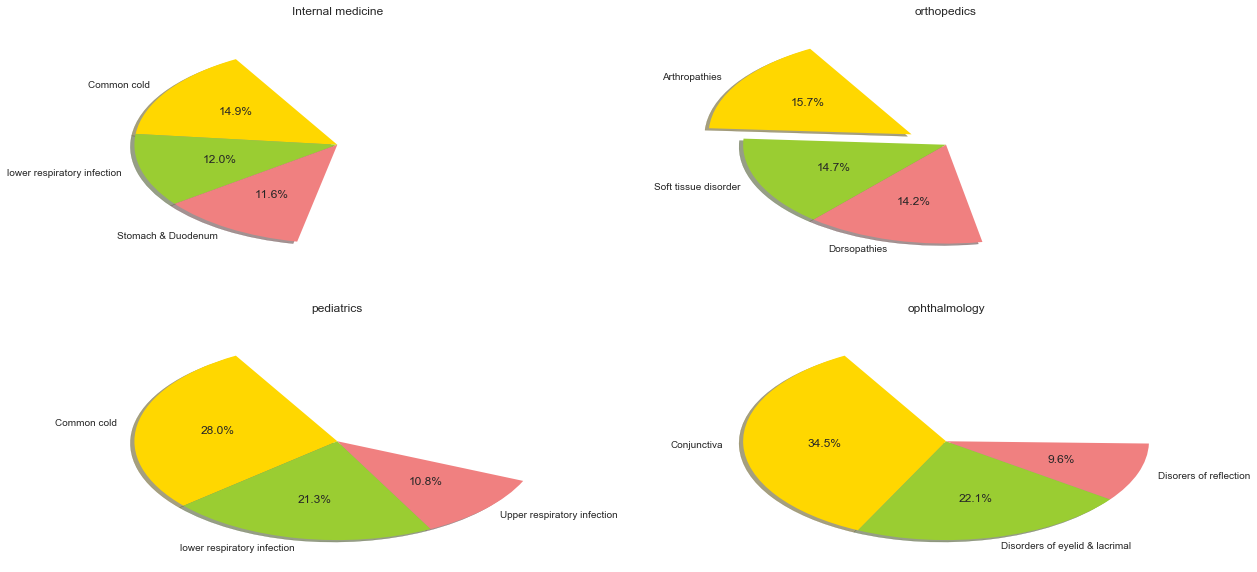

In [51]:
fig = plt.figure(figsize=(20,10))
# 내과
data_gb_sick_1=data_gb[data_gb['treat_kind']==1]
data_gb_sick_1=data_gb_sick_1.groupby('main_sick_s').count()
data_gb_sick_1['ratio']=data_gb_sick_1['city']/data_gb_sick_1['city'].sum()
data_gb_sick_1=data_gb_sick_1.sort_values('ratio',ascending=False)
data_gb_sick_1=data_gb_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_gb_sick_1=data_gb_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_gb_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gb_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_gb_sick_2=data_gb[data_gb['treat_kind']==5]
data_gb_sick_2=data_gb_sick_2.groupby('main_sick_s').count()
data_gb_sick_2['ratio']=data_gb_sick_2['city']/data_gb_sick_2['city'].sum()
data_gb_sick_2=data_gb_sick_2.sort_values('ratio',ascending=False)
data_gb_sick_2=data_gb_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_gb_sick_2=data_gb_sick_2.iloc[:3]
explode = (0.2, 0, 0) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_gb_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gb_sick_2.index)
plt.title('orthopedics')
# 소아청소년과
data_gb_sick_3=data_gb[data_gb['treat_kind']==11]
data_gb_sick_3=data_gb_sick_3.groupby('main_sick_s').count()
data_gb_sick_3['ratio']=data_gb_sick_3['city']/data_gb_sick_3['city'].sum()
data_gb_sick_3=data_gb_sick_3.sort_values('ratio',ascending=False)
data_gb_sick_3=data_gb_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_gb_sick_3=data_gb_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_gb_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gb_sick_3.index)
plt.title('pediatrics')
# 안과
data_gb_sick_4=data_gb[data_gb['treat_kind']==12]
data_gb_sick_4=data_gb_sick_4.groupby('main_sick_s').count()
data_gb_sick_4['ratio']=data_gb_sick_4['city']/data_gb_sick_4['city'].sum()
data_gb_sick_4=data_gb_sick_4.sort_values('ratio',ascending=False)
data_gb_sick_4=data_gb_sick_4.rename(index={'H1':'Conjunctiva','H0':'Disorders of eyelid & lacrimal','H5':'Disorers of reflection'})
data_gb_sick_4=data_gb_sick_4.iloc[:3]
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_gb_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gb_sick_4.index)
plt.title('ophthalmology')

## Gyeongnam

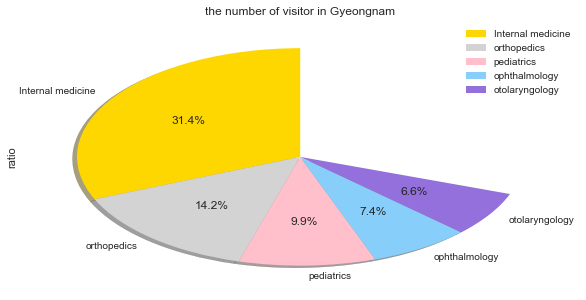

In [52]:
data_gn=data[data['city']==48]
data_gn_city=data_gn.groupby('treat_kind').count()
data_gn_city['ratio']=data_gn_city['city']/data_gn_city['city'].sum()
data_gn_city=data_gn_city.sort_values('ratio',ascending=False)
data_gn_city=data_gn_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_gn_city=data_gn_city.iloc[:5]
explode = (0, 0, 0, 0,0) 
colors = ['gold', 'lightgrey', 'pink', 'lightskyblue','mediumpurple']
data_gn_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Gyeongnam')

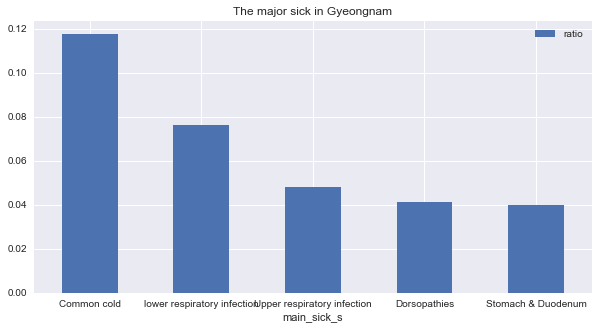

In [53]:
# The major sick in the Gyeongnam
data_gn_sick=data_gn.groupby('main_sick_s').count()
data_gn_sick['ratio']=data_gn_sick['city']/data_gn_sick['city'].sum()
data_gn_sick=data_gn_sick.sort_values('ratio',ascending=False)
data_gn_sick=data_gn_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','K2':'Stomach & Duodenum','M5':'Dorsopathies'})
data_gn_sick=data_gn_sick.iloc[:5]
data_gn_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Gyeongnam')

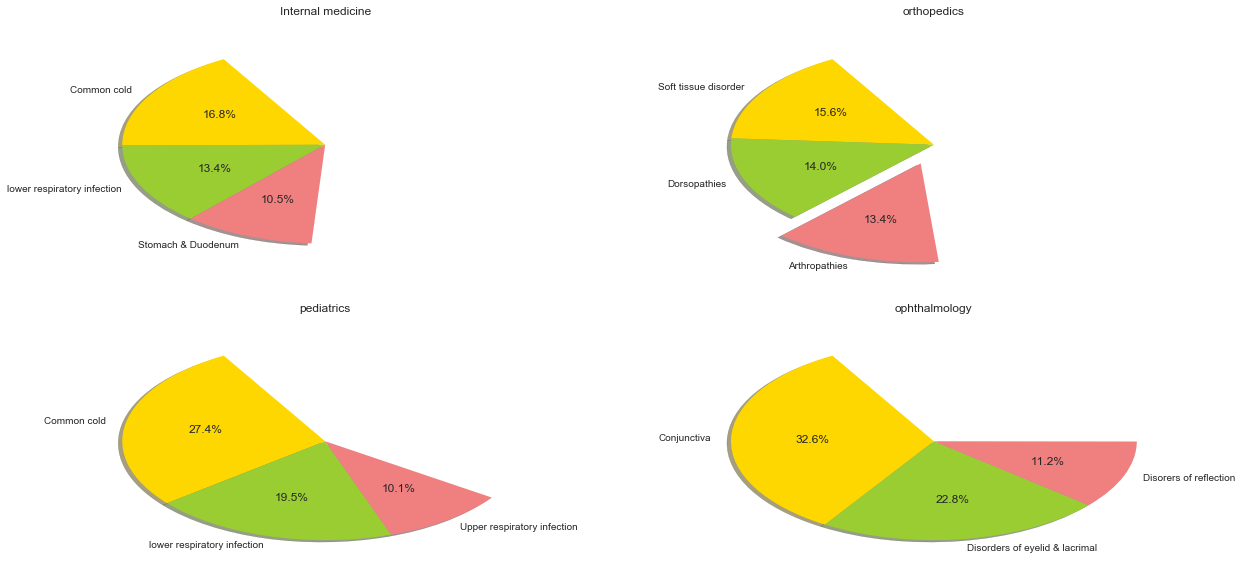

In [54]:
fig = plt.figure(figsize=(20,10))
# 내과
data_gn_sick_1=data_gn[data_gn['treat_kind']==1]
data_gn_sick_1=data_gn_sick_1.groupby('main_sick_s').count()
data_gn_sick_1['ratio']=data_gn_sick_1['city']/data_gn_sick_1['city'].sum()
data_gn_sick_1=data_gn_sick_1.sort_values('ratio',ascending=False)
data_gn_sick_1=data_gn_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_gn_sick_1=data_gn_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_gn_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gn_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_gn_sick_2=data_gn[data_gn['treat_kind']==5]
data_gn_sick_2=data_gn_sick_2.groupby('main_sick_s').count()
data_gn_sick_2['ratio']=data_gn_sick_2['city']/data_gn_sick_2['city'].sum()
data_gn_sick_2=data_gn_sick_2.sort_values('ratio',ascending=False)
data_gn_sick_2=data_gn_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_gn_sick_2=data_gn_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_gn_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gn_sick_2.index)
plt.title('orthopedics')
# 소아청소년과
data_gn_sick_3=data_gn[data_gn['treat_kind']==11]
data_gn_sick_3=data_gn_sick_3.groupby('main_sick_s').count()
data_gn_sick_3['ratio']=data_gn_sick_3['city']/data_gn_sick_3['city'].sum()
data_gn_sick_3=data_gn_sick_3.sort_values('ratio',ascending=False)
data_gn_sick_3=data_gn_sick_3.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_gn_sick_3=data_gn_sick_3.iloc[:3]
explode = (0, 0, 0) 
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_gn_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gn_sick_3.index)
plt.title('pediatrics')
# 안과
data_gn_sick_4=data_gn[data_gn['treat_kind']==12]
data_gn_sick_4=data_gn_sick_4.groupby('main_sick_s').count()
data_gn_sick_4['ratio']=data_gn_sick_4['city']/data_gn_sick_4['city'].sum()
data_gn_sick_4=data_gn_sick_4.sort_values('ratio',ascending=False)
data_gn_sick_4=data_gn_sick_4.rename(index={'H1':'Conjunctiva','H0':'Disorders of eyelid & lacrimal','H5':'Disorers of reflection'})
data_gn_sick_4=data_gn_sick_4.iloc[:3]
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_gn_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_gn_sick_4.index)
plt.title('ophthalmology')

## Jeju

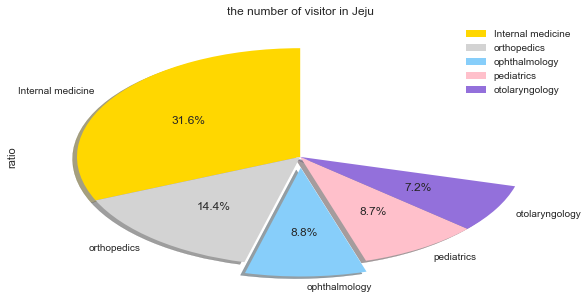

In [55]:
data_jj=data[data['city']==49]
data_jj_city=data_jj.groupby('treat_kind').count()
data_jj_city['ratio']=data_jj_city['city']/data_jj_city['city'].sum()
data_jj_city=data_jj_city.sort_values('ratio',ascending=False)
data_jj_city=data_jj_city.rename(index={1:'Internal medicine',5:'orthopedics',13:'otolaryngology',11:'pediatrics',12:'ophthalmology'})
data_jj_city=data_jj_city.iloc[:5]
explode = (0, 0, 0.1, 0,0) 
colors = ['gold', 'lightgrey', 'lightskyblue','pink','mediumpurple']
data_jj_city.plot.pie(y='ratio', explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=90, figsize=((10,5)))
plt.title('the number of visitor in Jeju')

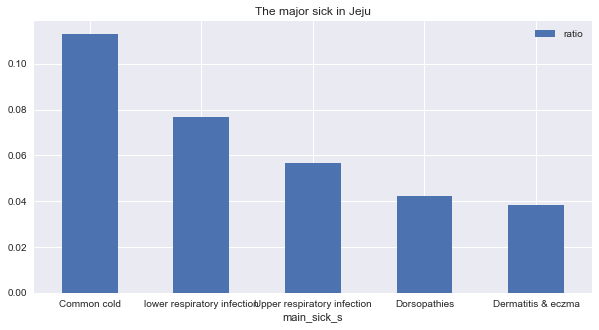

In [56]:
# The major sick in the Jeju
data_jj_sick=data_jj.groupby('main_sick_s').count()
data_jj_sick['ratio']=data_jj_sick['city']/data_jj_sick['city'].sum()
data_jj_sick=data_jj_sick.sort_values('ratio',ascending=False)
data_jj_sick=data_jj_sick.rename(index={'J0':'Common cold','J2':'lower respiratory infection','J3':'Upper respiratory infection','L2':'Dermatitis & eczma','M5':'Dorsopathies'})
data_jj_sick=data_jj_sick.iloc[:5]
data_jj_sick.plot.bar(y='ratio', rot=0,figsize=((10,5)))
plt.title('The major sick in Jeju')

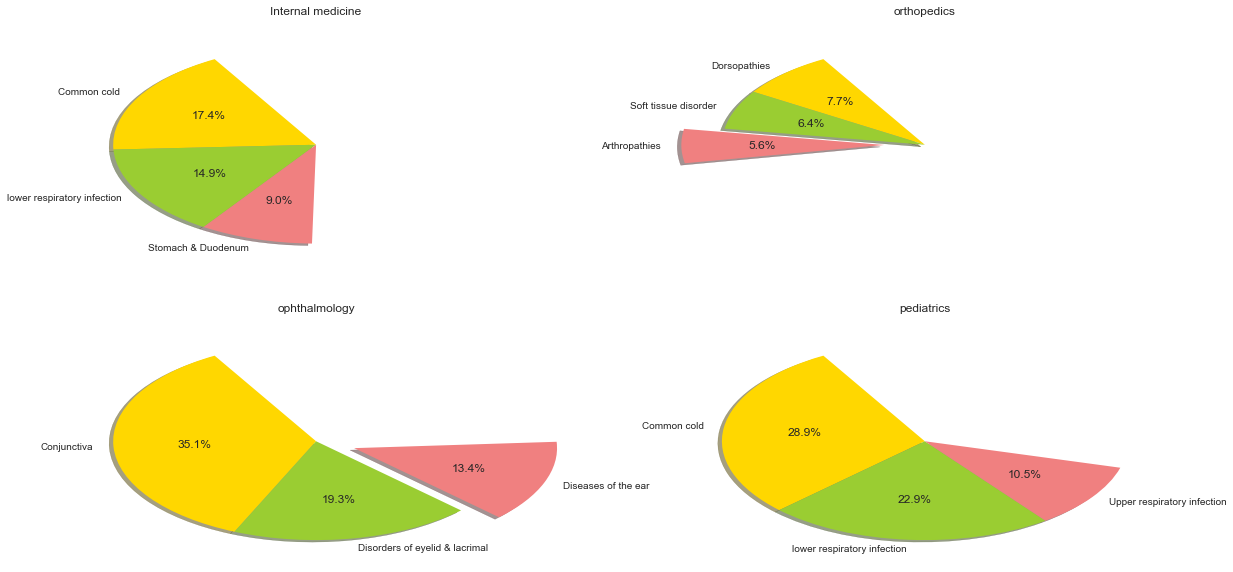

In [57]:
fig = plt.figure(figsize=(20,10))
# 내과
data_jj_sick_1=data_jj[data_jj['treat_kind']==1]
data_jj_sick_1=data_jj_sick_1.groupby('main_sick_s').count()
data_jj_sick_1['ratio']=data_jj_sick_1['city']/data_jj_sick_1['city'].sum()
data_jj_sick_1=data_jj_sick_1.sort_values('ratio',ascending=False)
data_jj_sick_1=data_jj_sick_1.rename(index={'J0':'Common cold','K2':'Stomach & Duodenum','J2':'lower respiratory infection'})
data_jj_sick_1=data_jj_sick_1.iloc[:3]
explode = (0, 0, 0) 
colors = ['gold', 'yellowgreen', 'lightcoral']
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(data_jj_sick_1.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jj_sick_1.index)
plt.title('Internal medicine')
# 정형외과
data_jj_sick_2=data_jj[data_jj['treat_kind']==5]
data_jj_sick_2=data_jj_sick_2.groupby('main_sick_s').count()
data_jj_sick_2['ratio']=data_jj_sick_2['city']/data_gn_sick_2['city'].sum()
data_jj_sick_2=data_jj_sick_2.sort_values('ratio',ascending=False)
data_jj_sick_2=data_jj_sick_2.rename(index={'M5':'Dorsopathies','M7':'Soft tissue disorder','M1':'Arthropathies'})
data_jj_sick_2=data_jj_sick_2.iloc[:3]
explode = (0, 0, 0.2) 
ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(data_jj_sick_2.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jj_sick_2.index)
plt.title('orthopedics')
# 안과
data_jj_sick_3=data_jj[data_jj['treat_kind']==12]
data_jj_sick_3=data_jj_sick_3.groupby('main_sick_s').count()
data_jj_sick_3['ratio']=data_jj_sick_3['city']/data_jj_sick_3['city'].sum()
data_jj_sick_3=data_jj_sick_3.sort_values('ratio',ascending=False)
data_jj_sick_3=data_jj_sick_3.rename(index={'H1':'Conjunctiva','H0':'Disorders of eyelid & lacrimal','H6':'Diseases of the ear'})
data_jj_sick_3=data_jj_sick_3.iloc[:3]
explode = (0, 0, 0.2)
ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(data_jj_sick_3.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jj_sick_3.index)
plt.title('ophthalmology')
# 소아청소년과
data_jj_sick_4=data_jj[data_jj['treat_kind']==11]
data_jj_sick_4=data_jj_sick_4.groupby('main_sick_s').count()
data_jj_sick_4['ratio']=data_jj_sick_4['city']/data_jj_sick_4['city'].sum()
data_jj_sick_4=data_jj_sick_4.sort_values('ratio',ascending=False)
data_jj_sick_4=data_jj_sick_4.rename(index={'J0':'Common cold','J3':'Upper respiratory infection','J2':'lower respiratory infection'})
data_jj_sick_4=data_jj_sick_4.iloc[:3]
explode = (0, 0, 0)
ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(data_jj_sick_4.ratio, explode=explode, shadow=True, colors=colors, autopct='%1.1f%%',startangle=120,labels=data_jj_sick_4.index)
plt.title('pediatrics')

## In terms of disease

In [305]:
data_sick=data.groupby('main_sick_s').count()
data_sick['ratio']=(data_sick['city']/data_sick['city'].sum())*100
data_sick=data_sick.sort_values('ratio',ascending=False)
data_sick=data_sick.rename(columns={'city':'number'})
data_sick=data_sick[['number','ratio']]
data_sick.head(20)
#J0= 감기, J2= 하기도감염, J3= 상기도감염, K2= 식도 , 위 및 십이지장 질환, M5= 등병증(척추질환), ....

,number,ratio
main_sick_s,,
J0,3256078,9.606094
J2,2820127,8.319949
I1,2090834,6.168386
M5,1890460,5.577242
J3,1508061,4.449087
M1,1296151,3.823910
M7,1117589,3.297115
K2,1087235,3.207565
L2,899726,2.654375


In [300]:
# 시도별 감기 환자 분포
data_cold_J0=data[data['main_sick_s']=='J0']
data_cold_J2=data[data['main_sick_s']=='J2']
data_cold_J3=data[data['main_sick_s']=='J3']
data_cold=pd.concat([data_cold_J0, data_cold_J2, data_cold_J3])
data_cold_city=data_cold.groupby('city').count()
data_cold_city=data_cold_city.rename(columns={'treat_kind':'number'})
data_cold_city=data_cold_city[['number']]
data_cold_city=data_cold_city.sort_values('number',ascending=False)
data_cold_city=data_cold_city.rename(index={41:'Geonggi',11:'Seoul',26:'Busan',48:'Geongnam',28:'Incheon',47:'Geongbuk',27:'Daegu',44:'Chungnam',45:'Jeonbuk',46:'Jeonnam',43:'Chungbuk',30:'Daejeon',42:'Gangwon',29:'Gwangju',31:'Ulsan',49:'Jeju'})
data_cold_city

,number
city,
Geonggi,1951700
Seoul,1441390
Busan,501095
Geongnam,487949
Incheon,436450
Geongbuk,360681
Daegu,350615
Chungnam,308911
Jeonbuk,276578


In [227]:
# 내과 비율
data_cold_city_im=data_cold[data_cold['treat_kind']==1]
data_cold_city_im['city'].count()/data_cold['city'].count()

0.38604513607513241

In [228]:
# 소아청소년과 비율
data_cold_city_im=data_cold[data_cold['treat_kind']==11]
data_cold_city_im['city'].count()/data_cold['city'].count()

0.29302360966769891

In [229]:
# 이비인후과 비율
data_cold_city_im=data_cold[data_cold['treat_kind']==13]
data_cold_city_im['city'].count()/data_cold['city'].count()

0.2488331764735045

In [295]:
# Make an empty map
m = folium.Map(location=[37.5102,126.982], tiles="Mapbox Bright", zoom_start=5)

In [290]:
# 감기 환자
folium.CircleMarker(location=[37.5663,126.977],popup='Seoul',radius=53,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.1795,129.0755],popup='Busan',radius=25.0,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.871,128.601],popup='Daegu',radius=17.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.4557,126.705],popup='Incheon',radius=21.8,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.1600,126.851],popup='Gwangju',radius=11,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.3496,127.383],popup='Daejeon',radius=12.6,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.5387,129.311],popup='Ulsan',radius=9.6,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.2632,127.028],popup='Gyeonggi',radius=70.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.881,127.732],popup='Gangwon',radius=9.25,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.641,127.488],popup='Chungbuk',radius=11.4,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.815,127.113],popup='Chungnam',radius=15.4,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.824,127.147],popup='Jeonbuk',radius=13.8,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[34.810,126.391],popup='Jeonnam',radius=13.75,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.019,129.343],popup='Geongbuk',radius=18,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.227,128.682],popup='Geongnam',radius=24.3,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[33.495,126.537],popup='Jaeju',radius=4.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)

In [291]:
m.save('C:\\김근하\\map_cold.html')

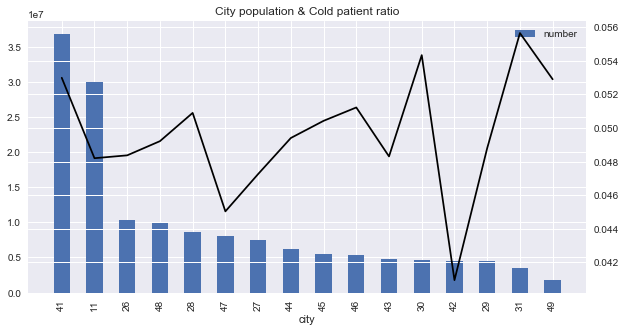

In [204]:
number_1=number.set_index(number['city'])
number_1=number_1[['number']]
new_data=pd.merge(number_1,data_cold_city,left_index=True,right_index=True)
new_data=new_data.rename(columns={'treat_kind':'cold_num'})
new_data=new_data[['number','cold_num']]
new_data['ratio']=new_data['cold_num']/new_data['number']
new_data=new_data.sort_values('number',ascending=False)
barplot=new_data[['number']].plot.bar(figsize=((10,5)))
lineplot=barplot.twinx()
lineplot.plot(barplot.get_xticks(),new_data['ratio'],color='black', linestyle='-', marker='o',mfc='None')
plt.title('City population & Cold patient ratio')

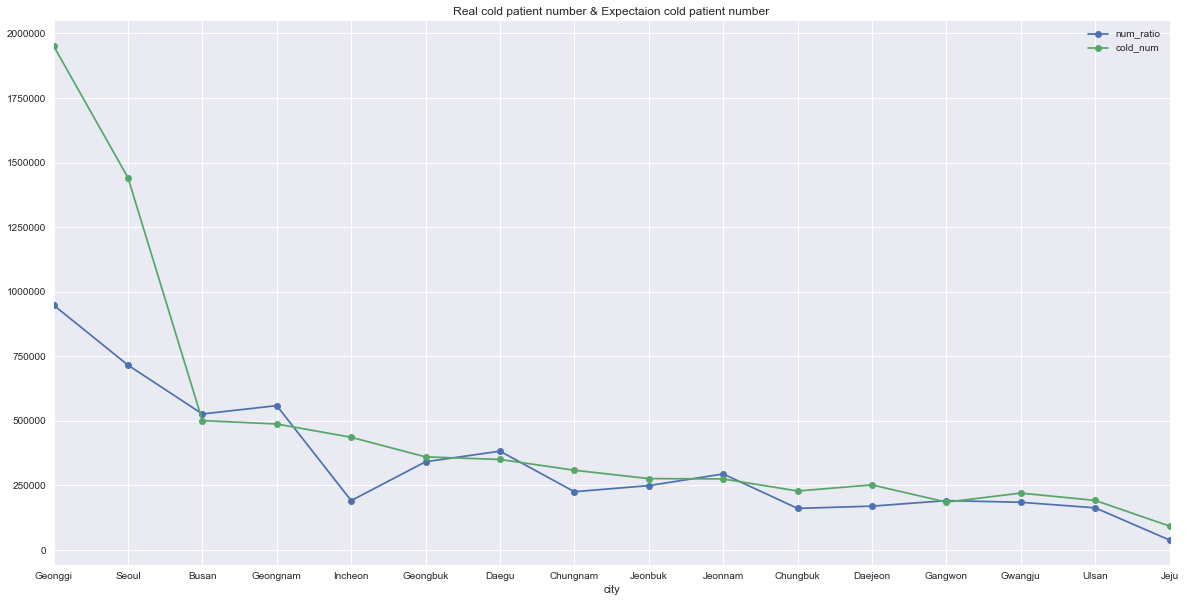

In [255]:
new_hos_num=hos_num.set_index(number['city'])
new_hos_num_im=new_hos_num[['Internal medicine','pediatrics','otolaryngology']]
new_data_im=pd.merge(new_data,new_hos_num_im,left_index=True,right_index=True)
new_data_im['num_ratio']=(3*2880*(new_data_im['Internal medicine']*(data_cold_city_im['city'].count()/data_cold['city'].count())+new_data_im['pediatrics']*(data_cold_city_im['city'].count()/data_cold['city'].count())+new_data_im['otolaryngology']*(data_cold_city_im['city'].count()/data_cold['city'].count())))
new_data_im=new_data_im.rename(index={41:'Geonggi',11:'Seoul',26:'Busan',48:'Geongnam',28:'Incheon',47:'Geongbuk',27:'Daegu',44:'Chungnam',45:'Jeonbuk',46:'Jeonnam',43:'Chungbuk',30:'Daejeon',42:'Gangwon',29:'Gwangju',31:'Ulsan',49:'Jeju'})
new_data_im=new_data_im.reset_index()
new_data_im.plot(x='city',y=['num_ratio','cold_num'],linestyle='-',marker='o',figsize=(20,10))
plt.xticks(new_data_im.index, new_data_im['city'], rotation=0)
plt.title('Real cold patient number & Expectaion cold patient number')
plt.savefig('cold_num.png', dpi=1000)

In [301]:
# 시도별 위장염 환자 분포
data_stom=data[data['main_sick_s']=='K2']
data_stom_city=data_stom.groupby('city').count()
data_stom_city=data_stom_city.sort_values('treat_kind',ascending=False)
data_stom_city=data_stom_city.rename(columns={'treat_kind':'number'})
data_stom_city=data_stom_city[['number']]
data_stom_city=data_stom_city.rename(index={41:'Geonggi',11:'Seoul',26:'Busan',48:'Geongnam',28:'Incheon',47:'Geongbuk',27:'Daegu',44:'Chungnam',45:'Jeonbuk',46:'Jeonnam',43:'Chungbuk',30:'Daejeon',42:'Gangwon',29:'Gwangju',31:'Ulsan',49:'Jeju'})
data_stom_city

,number
city,
Geonggi,246536
Seoul,210314
Busan,82897
Geongnam,66491
Geongbuk,60179
Incheon,58449
Daegu,52605
Chungnam,50693
Jeonbuk,47649


In [293]:
# 위장염 환자
folium.CircleMarker(location=[37.5663,126.977],popup='Seoul',radius=42,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.1795,129.0755],popup='Busan',radius=16,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.871,128.601],popup='Daegu',radius=10,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.4557,126.705],popup='Incheon',radius=10,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.1600,126.851],popup='Gwangju',radius=4,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.3496,127.383],popup='Daejeon',radius=6,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.5387,129.311],popup='Ulsan',radius=4,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.2632,127.028],popup='Gyeonggi',radius=48,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.881,127.732],popup='Gangwon',radius=6,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.641,127.488],popup='Chungbuk',radius=6,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.815,127.113],popup='Chungnam',radius=10,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.824,127.147],popup='Jeonbuk',radius=8,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[34.810,126.391],popup='Jeonnam',radius=8,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.019,129.343],popup='Geongbuk',radius=12,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.227,128.682],popup='Geongnam',radius=12,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[33.495,126.537],popup='Jaeju',radius=2,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)

In [294]:
m.save('C:\\김근하\\map_stom.html')

In [271]:
# 내과 비율
data_stom_city_im=data_stom[data_stom['treat_kind']==1]
data_stom_city_im['city'].count()/data_stom['city'].count()

0.84721334394128223

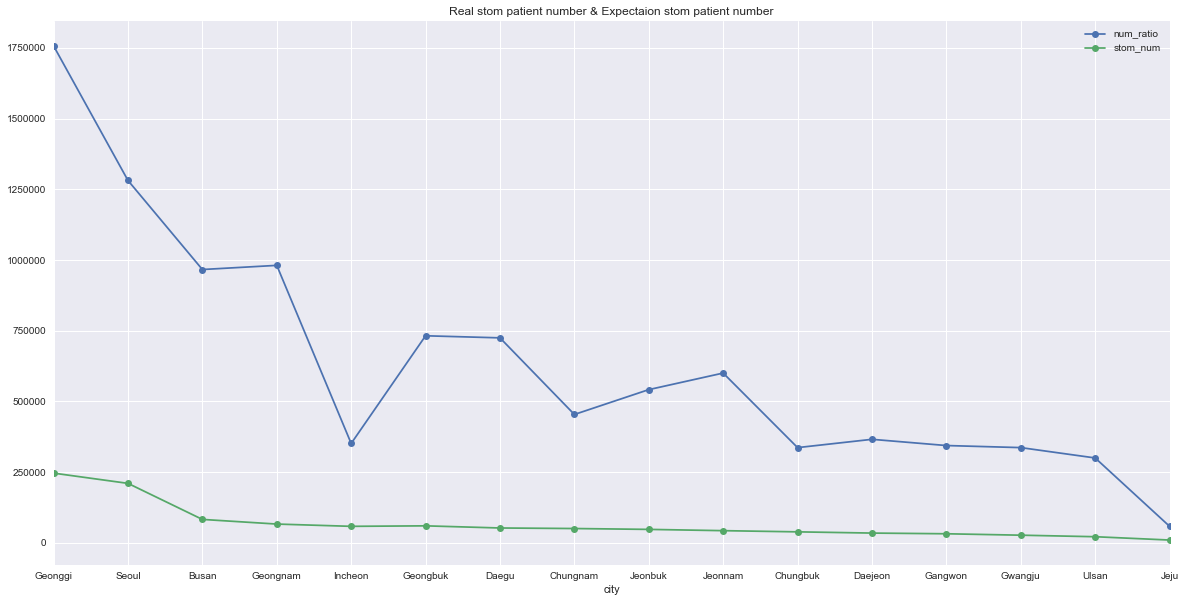

In [275]:
new_data_2=pd.merge(number_1,data_stom_city,left_index=True,right_index=True)
new_data_2=new_data_2.rename(columns={'treat_kind':'stom_num'})
new_data_2=new_data_2[['number','stom_num']]
new_data_2=new_data_2.sort_values('number',ascending=False)

new_hos_num_st=new_hos_num[['Internal medicine']]
new_data_st=pd.merge(new_data_2,new_hos_num_st,left_index=True,right_index=True)
new_data_st['num_ratio']=(3*2880*(new_data_st['Internal medicine'])*(data_stom_city_im['city'].count()/data_stom['city'].count()))
new_data_st=new_data_st.rename(index={41:'Geonggi',11:'Seoul',26:'Busan',48:'Geongnam',28:'Incheon',47:'Geongbuk',27:'Daegu',44:'Chungnam',45:'Jeonbuk',46:'Jeonnam',43:'Chungbuk',30:'Daejeon',42:'Gangwon',29:'Gwangju',31:'Ulsan',49:'Jeju'})
new_data_st=new_data_st.reset_index()
new_data_st.plot(x='city',y=['num_ratio','stom_num'],linestyle='-',marker='o',figsize=(20,10))
plt.xticks(new_data_st.index, new_data_st['city'], rotation=0)
plt.title('Real stom patient number & Expectaion stom patient number')
plt.savefig('stom_num.png', dpi=1000)

In [302]:
# 시도별 정형외과 환자 분포
data_bone_M1=data[data['main_sick_s']=='M1']
data_bone_M5=data[data['main_sick_s']=='M5']
data_bone_M7=data[data['main_sick_s']=='M7']
data_bone=pd.concat([data_bone_M1, data_bone_M5, data_bone_M7])
data_bone_city=data_bone.groupby('city').count()
data_bone_city=data_bone_city.sort_values('treat_kind',ascending=False)
data_bone_city=data_bone_city.rename(columns={'treat_kind':'number'})
data_bone_city=data_bone_city[['number']]
data_bone_city=data_bone_city.rename(index={41:'Geonggi',11:'Seoul',26:'Busan',48:'Geongnam',28:'Incheon',47:'Geongbuk',27:'Daegu',44:'Chungnam',45:'Jeonbuk',46:'Jeonnam',43:'Chungbuk',30:'Daejeon',42:'Gangwon',29:'Gwangju',31:'Ulsan',49:'Jeju'})
data_bone_city

,number
city,
Geonggi,811525
Seoul,695991
Geongnam,336663
Jeonnam,309454
Busan,301820
Geongbuk,278134
Jeonbuk,242348
Chungnam,234223
Incheon,210143


In [296]:
# 정형외과 환자
folium.CircleMarker(location=[37.5663,126.977],popup='Seoul',radius=34.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.1795,129.0755],popup='Busan',radius=15,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.871,128.601],popup='Daegu',radius=9.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.4557,126.705],popup='Incheon',radius=10.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.1600,126.851],popup='Gwangju',radius=5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.3496,127.383],popup='Daejeon',radius=5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.5387,129.311],popup='Ulsan',radius=4,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.2632,127.028],popup='Gyeonggi',radius=40.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[37.881,127.732],popup='Gangwon',radius=6,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.641,127.488],popup='Chungbuk',radius=8,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.815,127.113],popup='Chungnam',radius=11.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.824,127.147],popup='Jeonbuk',radius=12,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[34.810,126.391],popup='Jeonnam',radius=15,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[36.019,129.343],popup='Geongbuk',radius=13.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[35.227,128.682],popup='Geongnam',radius=16.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)
folium.CircleMarker(location=[33.495,126.537],popup='Jaeju',radius=3.5,color='#3186cc',fill=True,fill_color='#3186cc').add_to(m)

In [297]:
m.save('C:\\김근하\\map_bone.html')

In [279]:
# 정형외과 비율
data_bone_city_im=data_bone[data_bone['treat_kind']==5]
data_bone_city_im['city'].count()/data_bone['city'].count()

0.67144858510292271

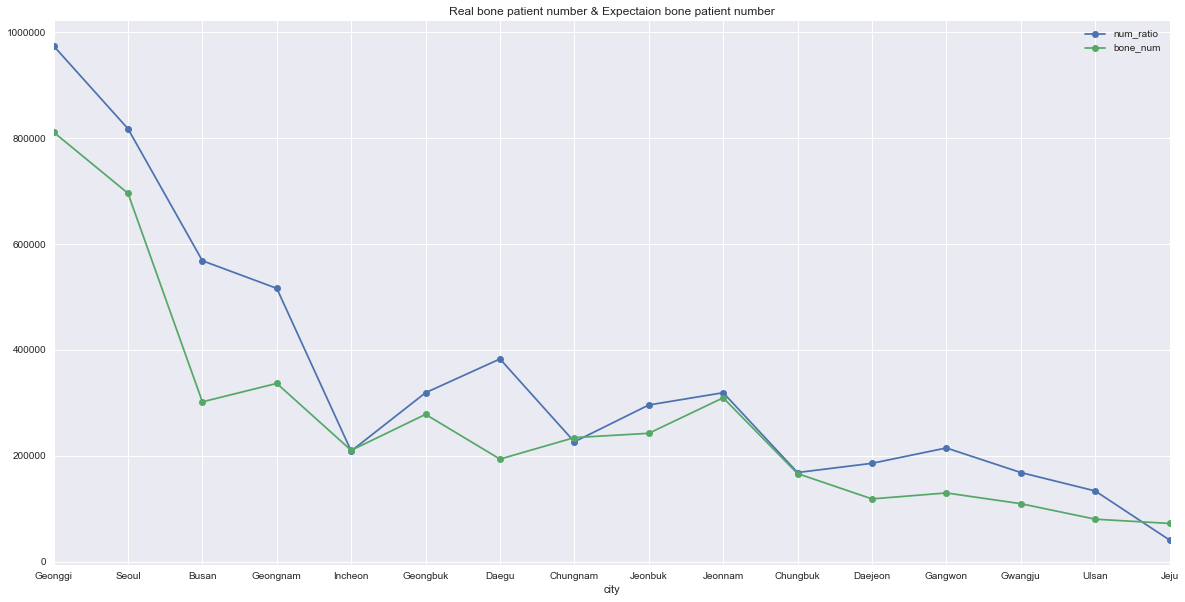

In [280]:
new_data_3=pd.merge(number_1,data_bone_city,left_index=True,right_index=True)
new_data_3=new_data_3.rename(columns={'treat_kind':'bone_num'})
new_data_3=new_data_3[['number','bone_num']]
new_data_3=new_data_3.sort_values('number',ascending=False)

new_hos_num_bo=new_hos_num[['orthopedics']]
new_data_bo=pd.merge(new_data_3,new_hos_num_bo,left_index=True,right_index=True)
new_data_bo['num_ratio']=(3*2880*(new_data_bo['orthopedics'])*(data_bone_city_im['city'].count()/data_bone['city'].count()))
new_data_bo=new_data_bo.rename(index={41:'Geonggi',11:'Seoul',26:'Busan',48:'Geongnam',28:'Incheon',47:'Geongbuk',27:'Daegu',44:'Chungnam',45:'Jeonbuk',46:'Jeonnam',43:'Chungbuk',30:'Daejeon',42:'Gangwon',29:'Gwangju',31:'Ulsan',49:'Jeju'})
new_data_bo=new_data_bo.reset_index()
new_data_bo.plot(x='city',y=['num_ratio','bone_num'],linestyle='-',marker='o',figsize=(20,10))
plt.xticks(new_data_bo.index, new_data_bo['city'], rotation=0)
plt.title('Real bone patient number & Expectaion bone patient number')
plt.savefig('bone_num.png', dpi=1000)